In [87]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

#After line 28, we use visualization libraries

import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sklearn
%matplotlib inline


In [88]:
df = pd.read_csv("./survey.csv")

In [89]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [90]:
"""
Timestamp
Age
Gender
Country
state: If you live in the United States, which state or territory do you live in?
self_employed: Are you self-employed?
family_history: Do you have a family history of mental illness?
treatment: Have you sought treatment for a mental health condition?
work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
no_employees: How many employees does your company or organization have?
remote_work: Do you work remotely (outside of an office) at least 50% of the time?
tech_company: Is your employer primarily a tech company/organization?
benefits: Does your employer provide mental health benefits?
care_options: Do you know the options for mental health care your employer provides?
wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
leave: How easy is it for you to take medical leave for a mental health condition?
mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
coworkers: Would you be willing to discuss a mental health issue with your coworkers?
physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
comments: Any additional notes or comments
"""

'\nTimestamp\nAge\nGender\nCountry\nstate: If you live in the United States, which state or territory do you live in?\nself_employed: Are you self-employed?\nfamily_history: Do you have a family history of mental illness?\ntreatment: Have you sought treatment for a mental health condition?\nwork_interfere: If you have a mental health condition, do you feel that it interferes with your work?\nno_employees: How many employees does your company or organization have?\nremote_work: Do you work remotely (outside of an office) at least 50% of the time?\ntech_company: Is your employer primarily a tech company/organization?\nbenefits: Does your employer provide mental health benefits?\ncare_options: Do you know the options for mental health care your employer provides?\nwellness_program: Has your employer ever discussed mental health as part of an employee wellness program?\nseek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?\nanonymity

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [92]:
"""
--> Total 26 columns in the dataset.
--> except age column, all the columns are of object datatype.
--> Comment column seems to contain most ( 70% ) of null values, which makes sense because it was an optional text box so it's reasonable to expect that many (most) respondents would leave it blank.
--> We will be dropping the timestamp column because it's contains date, month, year and time the respondent took this questionnaire, which is irrelevant for us.
--> The state column also contains a lot of null values. Some treatment will be required.
"""

"\n--> Total 26 columns in the dataset.\n--> except age column, all the columns are of object datatype.\n--> Comment column seems to contain most ( 70% ) of null values, which makes sense because it was an optional text box so it's reasonable to expect that many (most) respondents would leave it blank.\n--> We will be dropping the timestamp column because it's contains date, month, year and time the respondent took this questionnaire, which is irrelevant for us.\n--> The state column also contains a lot of null values. Some treatment will be required.\n"

In [93]:
print(df['Country'].value_counts())
print("\n \n")
print(df['state'].unique())

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

In [94]:
"""
--> Because the US makes up around 60% of the world's population in this data, 
    it would be quite deceptive to conclude that a certain nation has more issues with the mental health of its workforce.
--> In addition, several countries only have one respondent.
--> This renders the country column meaningless. So this should be dropped.

--> We will also be dropping it because a quick glance at the states indicates that it is only applicable to those in the US.
"""

"\n--> Because the US makes up around 60% of the world's population in this data, \n    it would be quite deceptive to conclude that a certain nation has more issues with the mental health of its workforce.\n--> In addition, several countries only have one respondent.\n--> This renders the country column meaningless. So this should be dropped.\n\n--> We will also be dropping it because a quick glance at the states indicates that it is only applicable to those in the US.\n"

In [95]:
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1241 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             995 non-null    object
 6   no_employees               1259 non-null   object
 7   remote_work                1259 non-null   object
 8   tech_company               1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

In [97]:
"""Let us treat our data now"""

'Let us treat our data now'

In [98]:
print("The dataset contains different age groups including: \n")
print(df['Age'].unique())

The dataset contains different age groups including: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [99]:
"""How can age be negative? and younger than fifteen years old should not have the right to work?"""

'How can age be negative? and younger than fifteen years old should not have the right to work?'

In [100]:
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)

In [101]:
print("The different gender notations used in our dataset are: \n")
print(df['Gender'].unique())

The different gender notations used in our dataset are: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [102]:
"""many different genders, in many different ways, which can be treated ofcourse, by classifying them into three categories"""

'many different genders, in many different ways, which can be treated ofcourse, by classifying them into three categories'

In [103]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Gender
Male      988
Female    247
Other      19
Name: count, dtype: int64

In [104]:
print(df['Age'].unique())
print("\n \n")
print(df['Gender'].unique())
df['Gender'].value_counts()

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]

 

['Female' 'Male' 'Other']


Gender
Male      988
Female    247
Other      19
Name: count, dtype: int64

In [105]:
"""
--> Sorted Age and Gender
--> It can be noticed, that males are 4 times the no. of females, which states that this data cannot help us make inferences mental health issues on the basis of gender.
--> This is important to remember so that we don't assume incorrectly that men are more prone to mental health problems.
--> We can get the conclusion that there are much more men than women working in the tech sector.
"""

"\n--> Sorted Age and Gender\n--> It can be noticed, that males are 4 times the no. of females, which states that this data cannot help us make inferences mental health issues on the basis of gender.\n--> This is important to remember so that we don't assume incorrectly that men are more prone to mental health problems.\n--> We can get the conclusion that there are much more men than women working in the tech sector.\n"

In [106]:
"""Time to import some visualization libraries on the top like matplotlib, seaborn, plotly express"""

'Time to import some visualization libraries on the top like matplotlib, seaborn, plotly express'

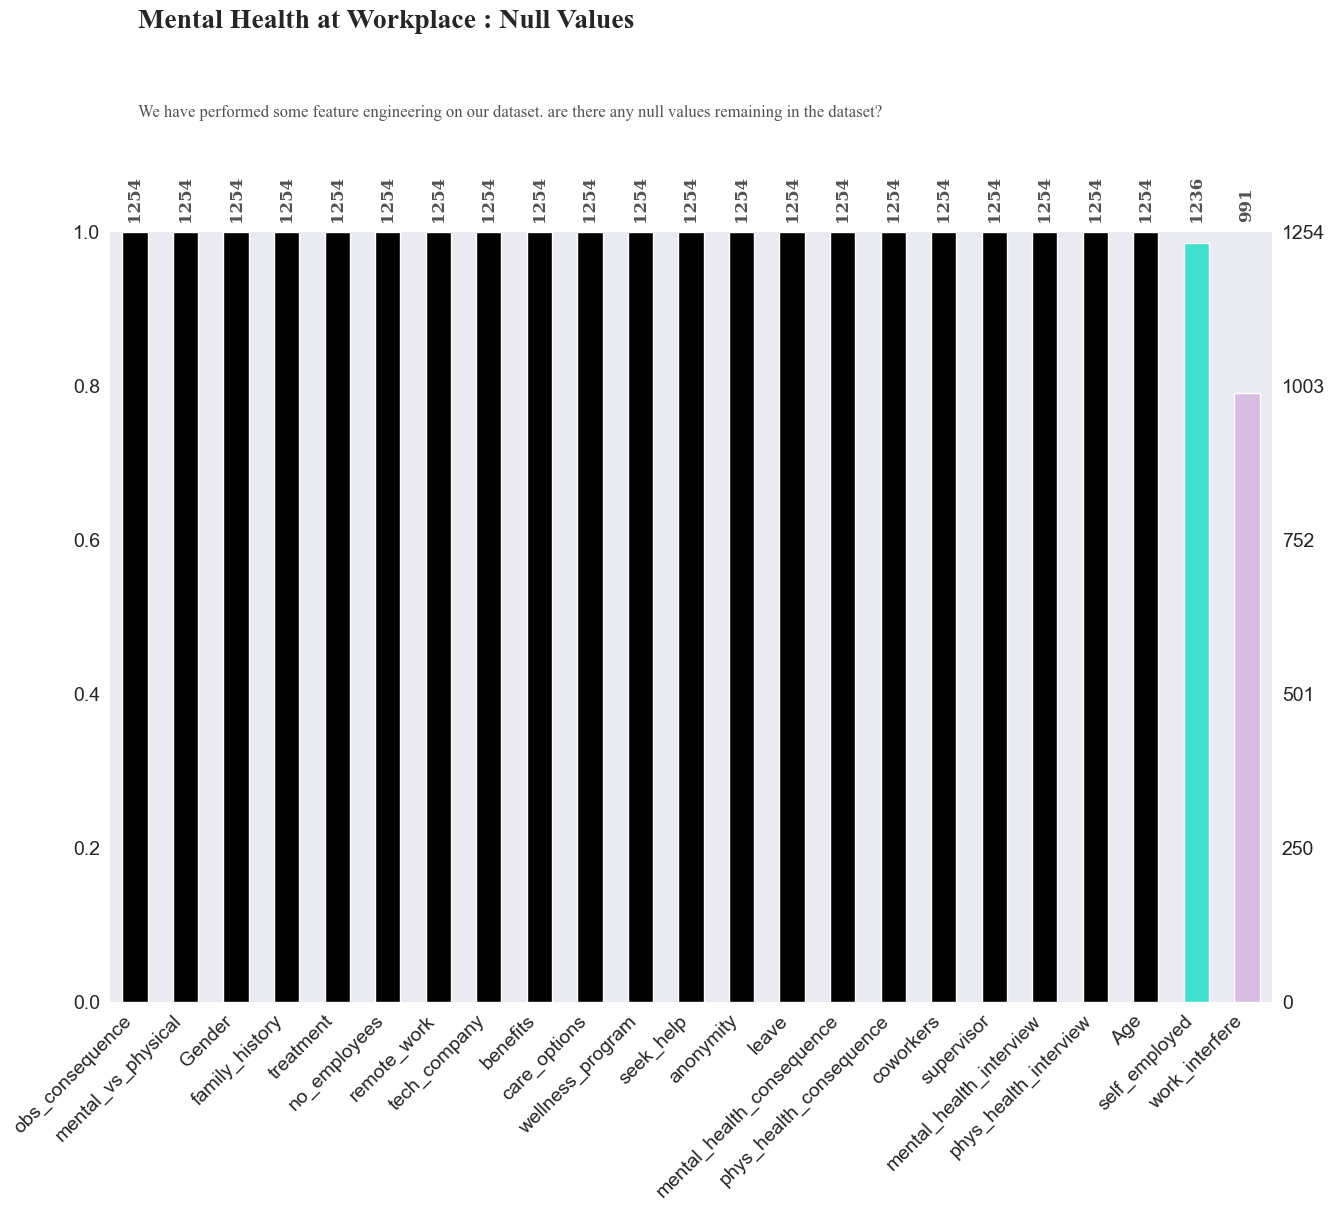

In [107]:
sns.set_style('dark')
color = ['black','black','black','black','black','black','black','black','black','black','black','black','black','black','black','black','black','black','black','black','black','#40E0D0','#D7BDE2']
msno.bar(df,fontsize =14, color = color, sort = 'descending', figsize = (15,10))

plt.text(0.05,1.265,'Mental Health at Workplace : Null Values', {'font':'Times New Roman', 'size':20, 'weight':'bold'})
plt.text(0.05,1.15,'''We have performed some feature engineering on our dataset. are there any null values remaining in the dataset?''', {'font':'Times New Roman', 'size':12, 'weight':'normal'}, alpha = 0.8)
plt.xticks( rotation = 90, 
                   **{'font':'serif','size':12,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()

In [108]:
"""
'self_employed' has 18 null values
'work_interfere' has null values, we will see whenever we need to treat this.

"""

"\n'self_employed' has 18 null values\n'work_interfere' has null values, we will see whenever we need to treat this.\n\n"

In [109]:
"""
EXPLORATORY DATA ANALYSIS

"""


'\nEXPLORATORY DATA ANALYSIS\n\n'

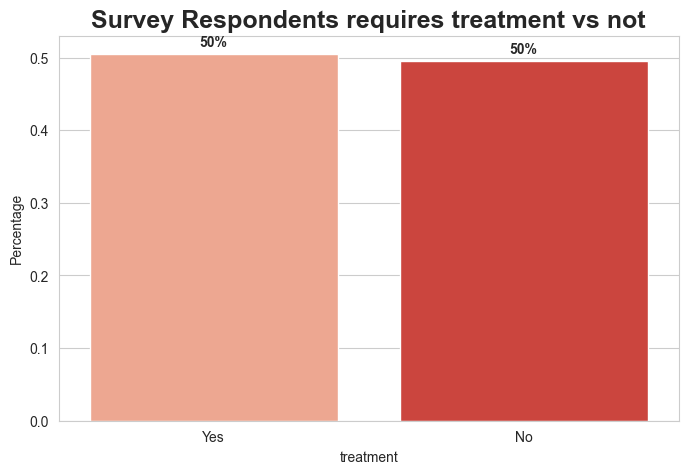

In [110]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Survey Respondents requires treatment vs not', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Reds')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [111]:
"""
Have you sought treatment for a mental health condition? = Target Variable
--> the percentage of respondents who want to get treatment is exactly 50%
If employees enjoy good mental health, employees can:

Be more productive
Take active participation in employee engagement activities and make better relations; both at workplace and personal life.
Be more joyous and make people around them happy.

"""

'\nHave you sought treatment for a mental health condition? = Target Variable\n--> the percentage of respondents who want to get treatment is exactly 50%\nIf employees enjoy good mental health, employees can:\n\nBe more productive\nTake active participation in employee engagement activities and make better relations; both at workplace and personal life.\nBe more joyous and make people around them happy.\n\n'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


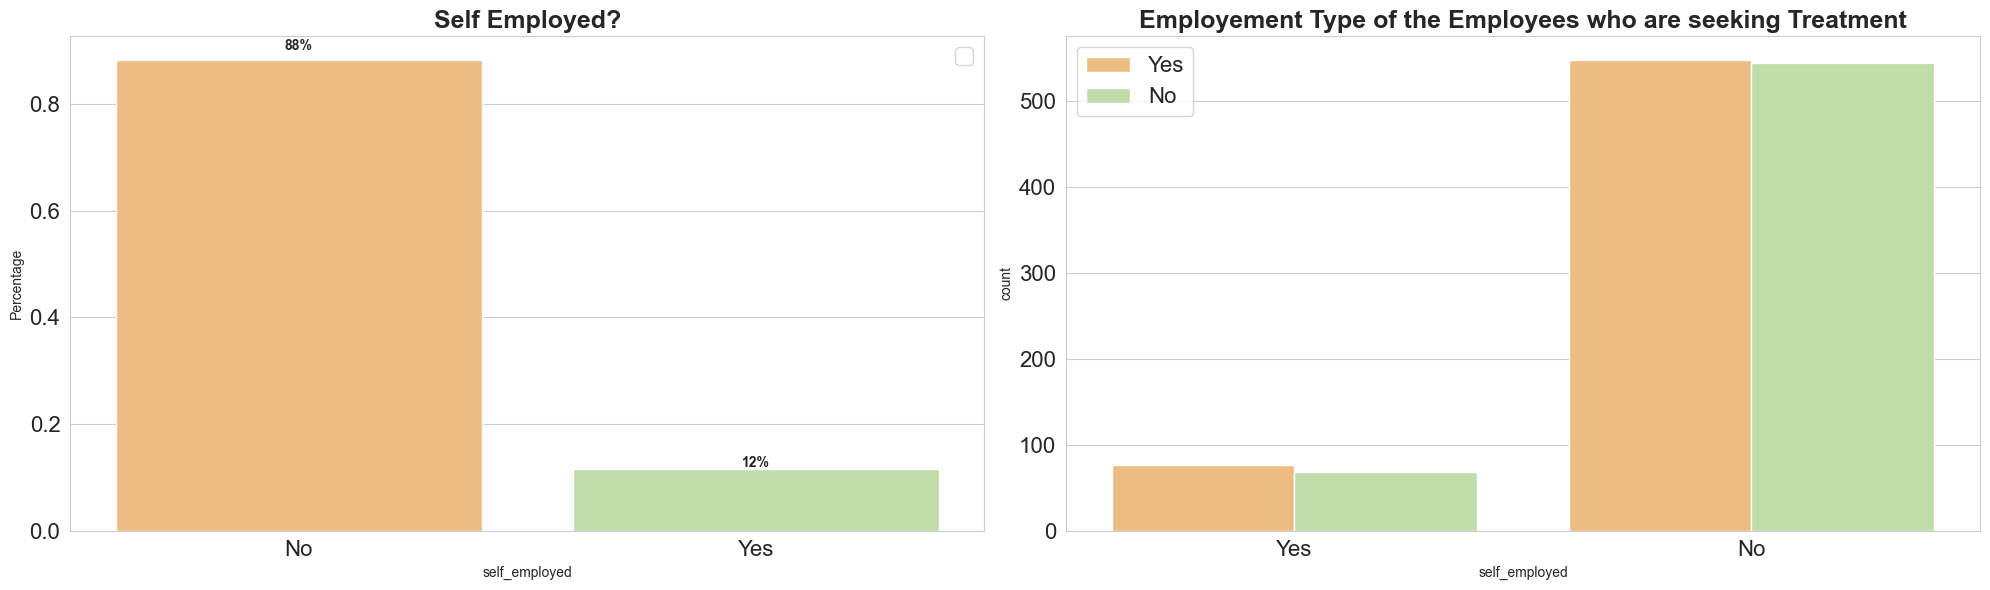

In [112]:
plt.figure(figsize = (30,6))
plt.subplot(1,2,1)
eda_percentage = df['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = eda_percentage, palette = 'Spectral')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Self Employed?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='self_employed', hue='treatment', data=df, palette = 'Spectral')
plt.title('Employement Type of the Employees who are seeking Treatment',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.legend(fontsize=16)

plt.tight_layout()
plt.show()

In [113]:
"""
**SOLVED NOW**
Trying to understand error above, the graph on the right side  is not right. This is not what i want. 
I want comparisons of yes and no with self employed or not. So like 2 bars for one variable. 
**SOLVED NOW**
"""
"""
Q: Are you self-employed?
--> 10% of people are self employed
--> Most of the people who responded to the survey belonged to working class.
--> There is a vast difference between people who are self employed or not, the number of people who seek treatment in both the categories is more or less similar

we may conclude that whether a person is self employed or not, does not largely affect whether he may be seeking mental treatment or not.
"""

'\nQ: Are you self-employed?\n--> 10% of people are self employed\n--> Most of the people who responded to the survey belonged to working class.\n--> There is a vast difference between people who are self employed or not, the number of people who seek treatment in both the categories is more or less similar\n\nwe may conclude that whether a person is self employed or not, does not largely affect whether he may be seeking mental treatment or not.\n'

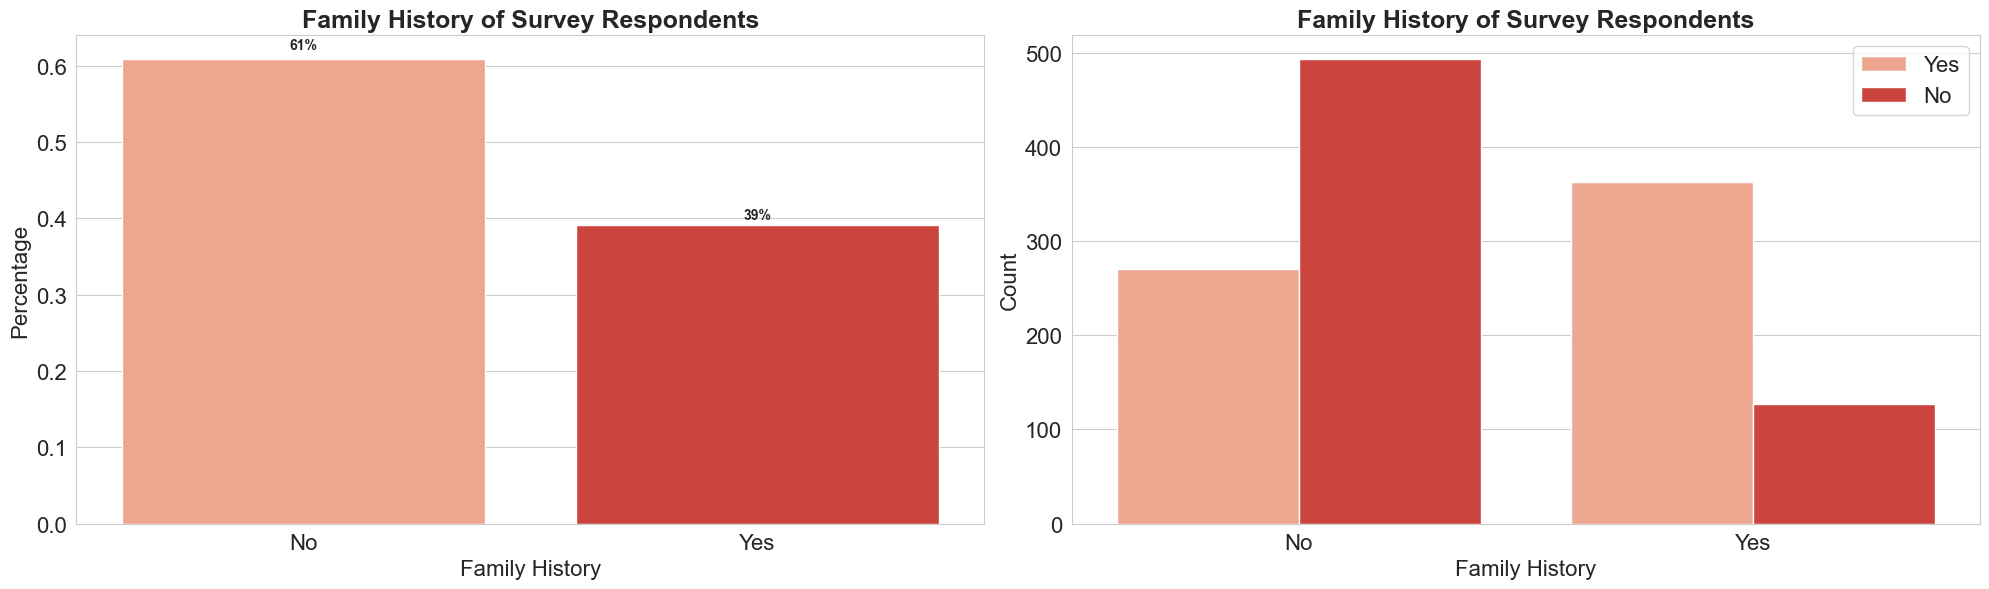

In [114]:
plt.figure(figsize = (30,6))

plt.subplot(1,2,1)
eda_percentage = df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage, palette='Reds')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Family History', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
#plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='family_history', hue='treatment', data=df, palette='Reds')
plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Family History', fontsize=16)
plt.ylabel('Count', fontsize=16)    
plt.legend(fontsize=16)

plt.tight_layout()
plt.show()

In [115]:
"""
Q: Do you have a family history of mental illness?
--> 39% of respondents have a family history of mental illness
--> the plot shows that they significantly want to get treatment rather than without a family history
--> the fact that people with a family history pay more attention to mental illness.
--> Family history is a significant risk factor for many mental health disorders.

this is an important factor that has to be taken under consideration as it influences the behaviour of the employees to a significant extent.
"""

'\nQ: Do you have a family history of mental illness?\n--> 39% of respondents have a family history of mental illness\n--> the plot shows that they significantly want to get treatment rather than without a family history\n--> the fact that people with a family history pay more attention to mental illness.\n--> Family history is a significant risk factor for many mental health disorders.\n\nthis is an important factor that has to be taken under consideration as it influences the behaviour of the employees to a significant extent.\n'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


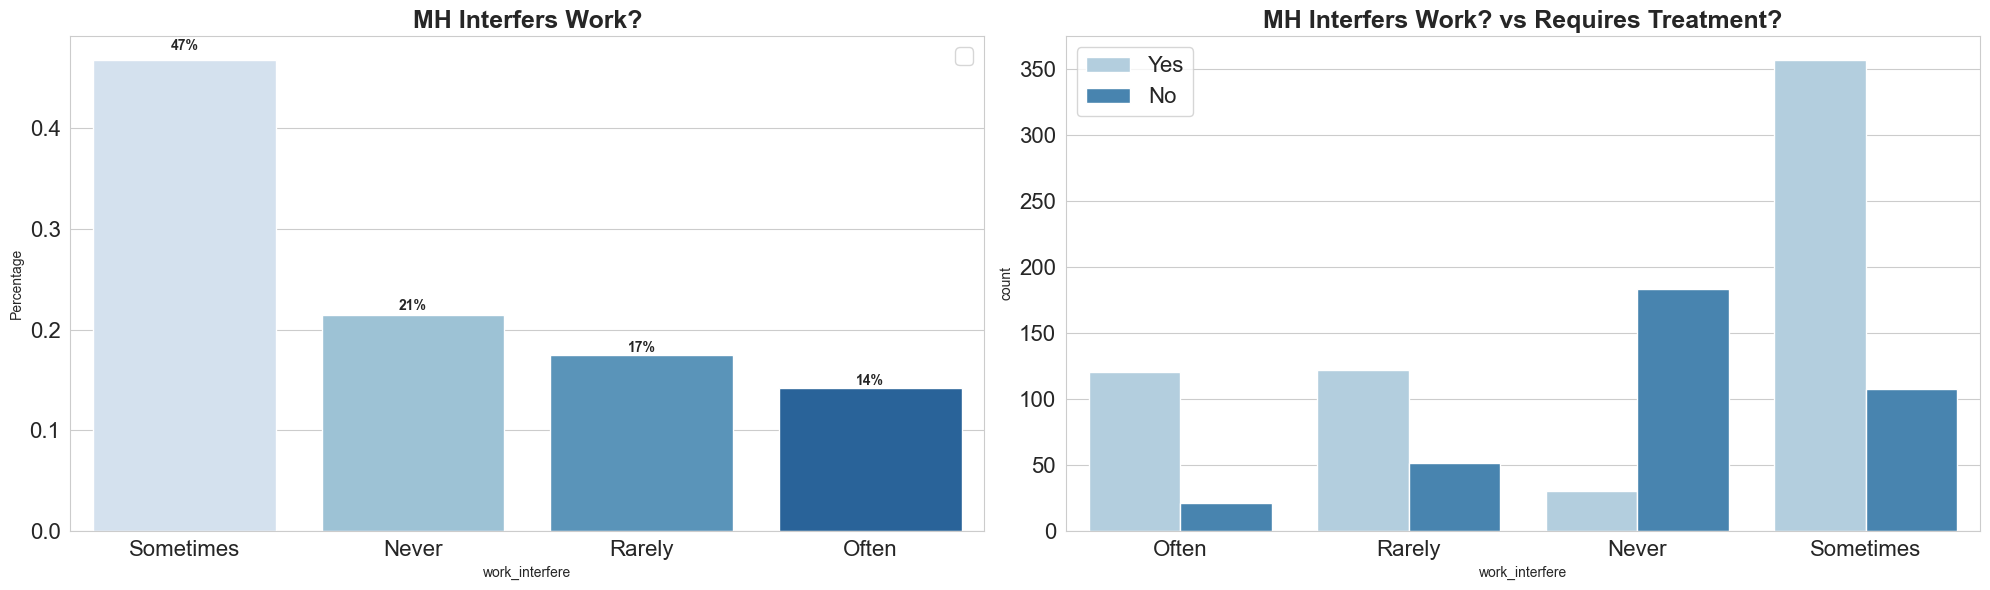

In [116]:
plt.figure(figsize = (30,6))
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='Blues')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('MH Interfers Work?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='work_interfere', hue ='treatment', data=df, palette = 'Blues')
plt.title('MH Interfers Work? vs Requires Treatment?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.tight_layout()
plt.show()

In [117]:
"""
Q: If you have a mental health condition, do you feel that it interferes with your work?
--> 47% of people say that sometimes work interefers with their mental health. people who actually face a condition but are too shy/reluctant to choose the extreme category.
--> In second graph, the people who chose 'Sometimes' are the highest number of people who actually had a mental condition.
--> Similar pattern was shown for the people who belonged to the *'Often category'.
--> what is more surprising to know is that even for people whose mental health 'Never' has interfered at work, 
    there is a little group that still want to get treatment before it become a job stress.
--> It can be triggered a variety of reasons like the requirements of the job do not match the capabilities, resources or needs of the worker. 
"""

"\nQ: If you have a mental health condition, do you feel that it interferes with your work?\n--> 47% of people say that sometimes work interefers with their mental health. people who actually face a condition but are too shy/reluctant to choose the extreme category.\n--> In second graph, the people who chose 'Sometimes' are the highest number of people who actually had a mental condition.\n--> Similar pattern was shown for the people who belonged to the *'Often category'.\n--> what is more surprising to know is that even for people whose mental health 'Never' has interfered at work, \n    there is a little group that still want to get treatment before it become a job stress.\n--> It can be triggered a variety of reasons like the requirements of the job do not match the capabilities, resources or needs of the worker. \n"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


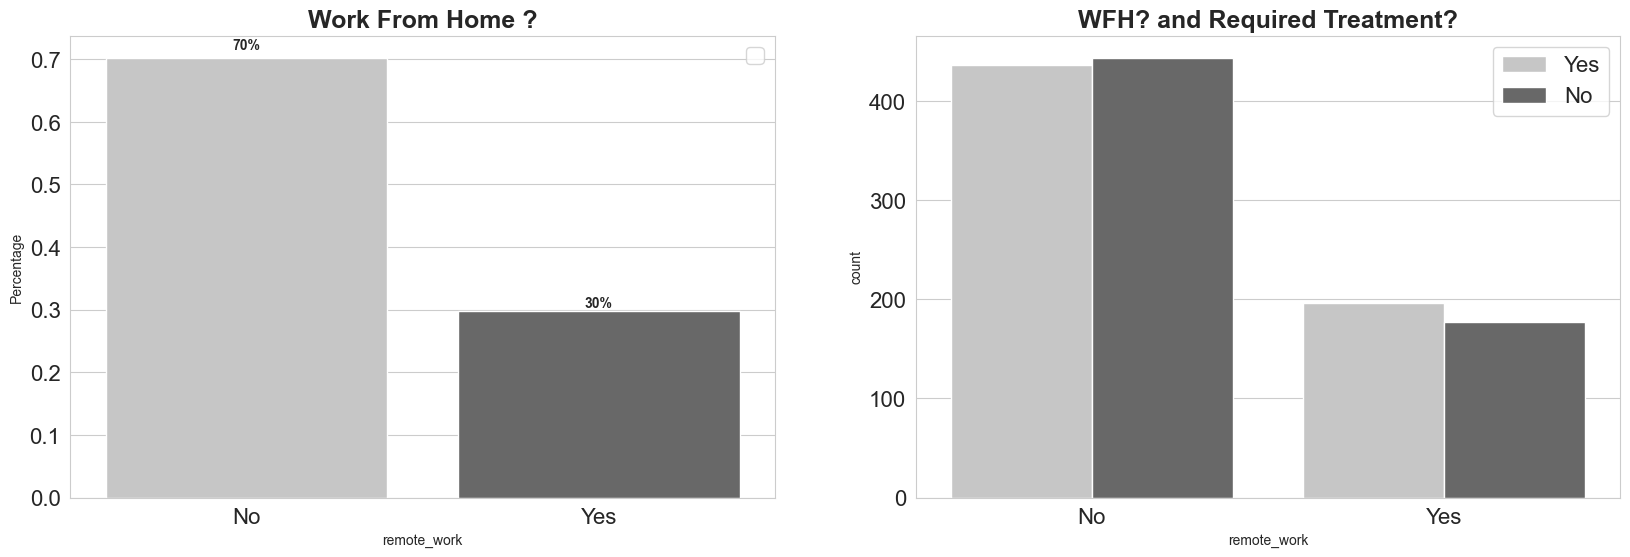

In [118]:
plt.figure(figsize = (30,6))
plt.subplot(1,2,1)
eda_percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = eda_percentage, palette='Greys')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work From Home ?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='remote_work', data=df, hue ='treatment', palette='Greys')
plt.title('WFH? and Required Treatment?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [119]:
"""
Q: Do you work remotely (outside of an office) at least 50% of the time?
--> 70% of respondents don't work remotely
--> the biggest factor of mental health disorder came up triggered on the workplace
--> it has slightly different between an employee that want to get treatment and don't want to get a treatment.
--> The number of people who seek treatment in both the categories is more or less similar and it does not affect our target variable.

"""

"\nQ: Do you work remotely (outside of an office) at least 50% of the time?\n--> 70% of respondents don't work remotely\n--> the biggest factor of mental health disorder came up triggered on the workplace\n--> it has slightly different between an employee that want to get treatment and don't want to get a treatment.\n--> The number of people who seek treatment in both the categories is more or less similar and it does not affect our target variable.\n\n"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


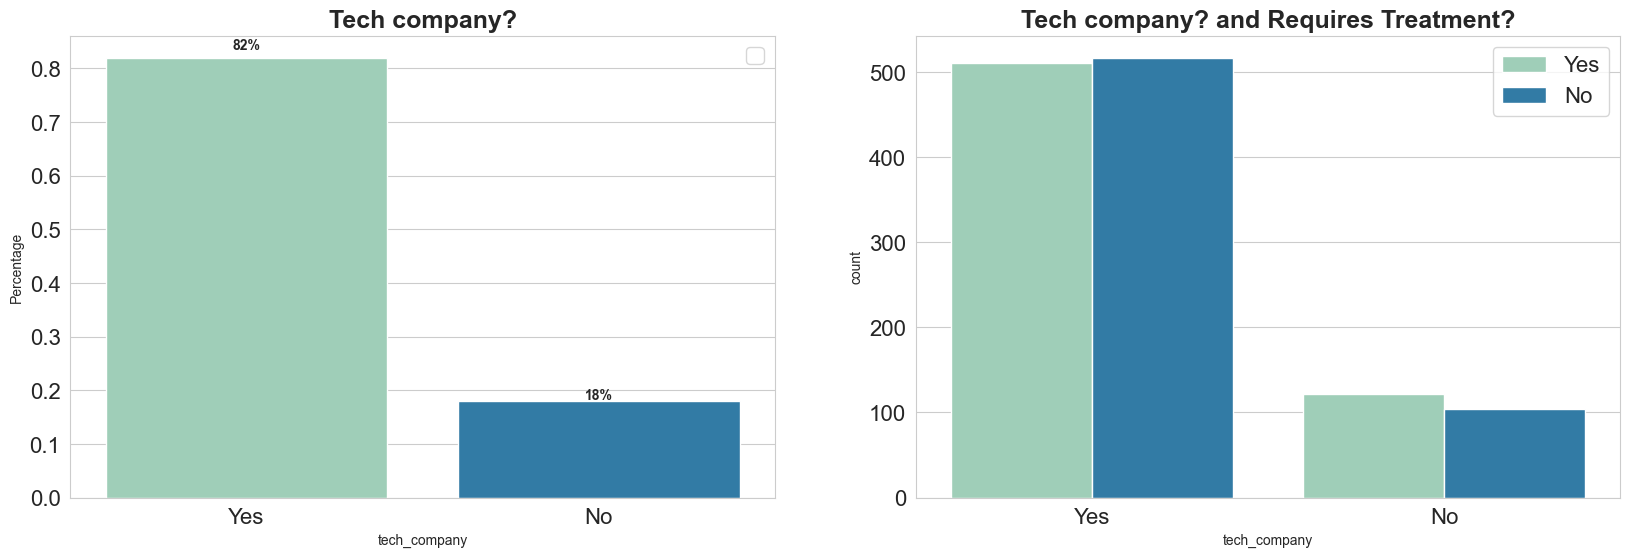

In [120]:
plt.figure(figsize = (30,6))
plt.subplot(1,2,1)
eda_percentage = df['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'tech_company', y = 'Percentage', data = eda_percentage, palette='YlGnBu')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Tech company?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='tech_company', data=df, hue='treatment', palette='YlGnBu')
plt.title('Tech company? and Requires Treatment?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [121]:
"""
Q: Is your employer primarily a tech company/organization?
--> 18% of the companies belonginf to the non tech field
--> looking at the second graph, one may conclude that whether a person belongs to the tech field or not, mental health still becomes a big problem
--> On a deeper look we find that the number of employees in the tech sector who want to get treatment is slightly lower than the one's who don't
--> But in the non-tech field the situation gets reversed
"""

"\nQ: Is your employer primarily a tech company/organization?\n--> 18% of the companies belonginf to the non tech field\n--> looking at the second graph, one may conclude that whether a person belongs to the tech field or not, mental health still becomes a big problem\n--> On a deeper look we find that the number of employees in the tech sector who want to get treatment is slightly lower than the one's who don't\n--> But in the non-tech field the situation gets reversed\n"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


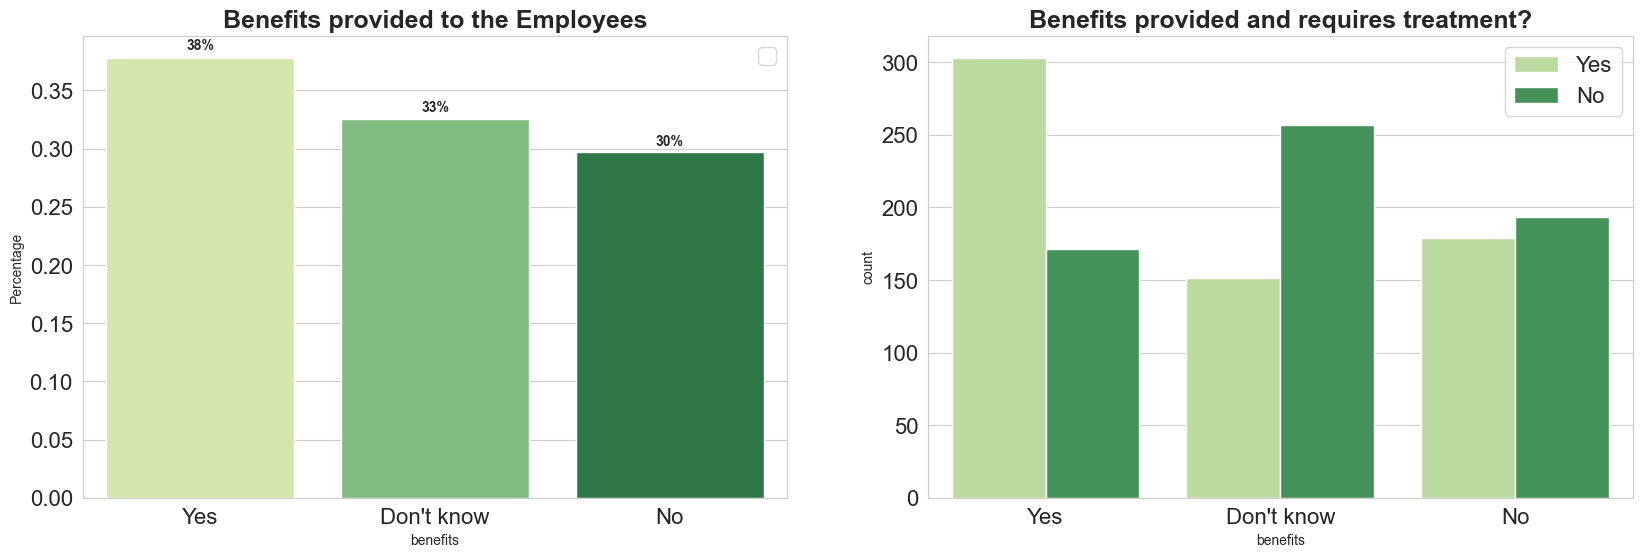

In [122]:
plt.figure(figsize = (30,6))
plt.subplot(1,2,1)
eda_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='YlGn')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='benefits', data=df, hue = 'treatment', palette='YlGn')
plt.title('Benefits provided and requires treatment?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [123]:
"""
Q: Does your employer provide mental health benefits?
--> 38% of the respondents said that their employer provided them mental health benefits, 
--> A significant number ( 32% ) of them didn't even know whether they were provided this benefit.
--> People who YES said to mental health benefits, around 63% of them said that they were seeking medical help.
--> the people who said NO for the mental health benefits provided by the company, close to 45% of them who want to seek mental health treatment.
"""

"\nQ: Does your employer provide mental health benefits?\n--> 38% of the respondents said that their employer provided them mental health benefits, \n--> A significant number ( 32% ) of them didn't even know whether they were provided this benefit.\n--> People who YES said to mental health benefits, around 63% of them said that they were seeking medical help.\n--> the people who said NO for the mental health benefits provided by the company, close to 45% of them who want to seek mental health treatment.\n"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


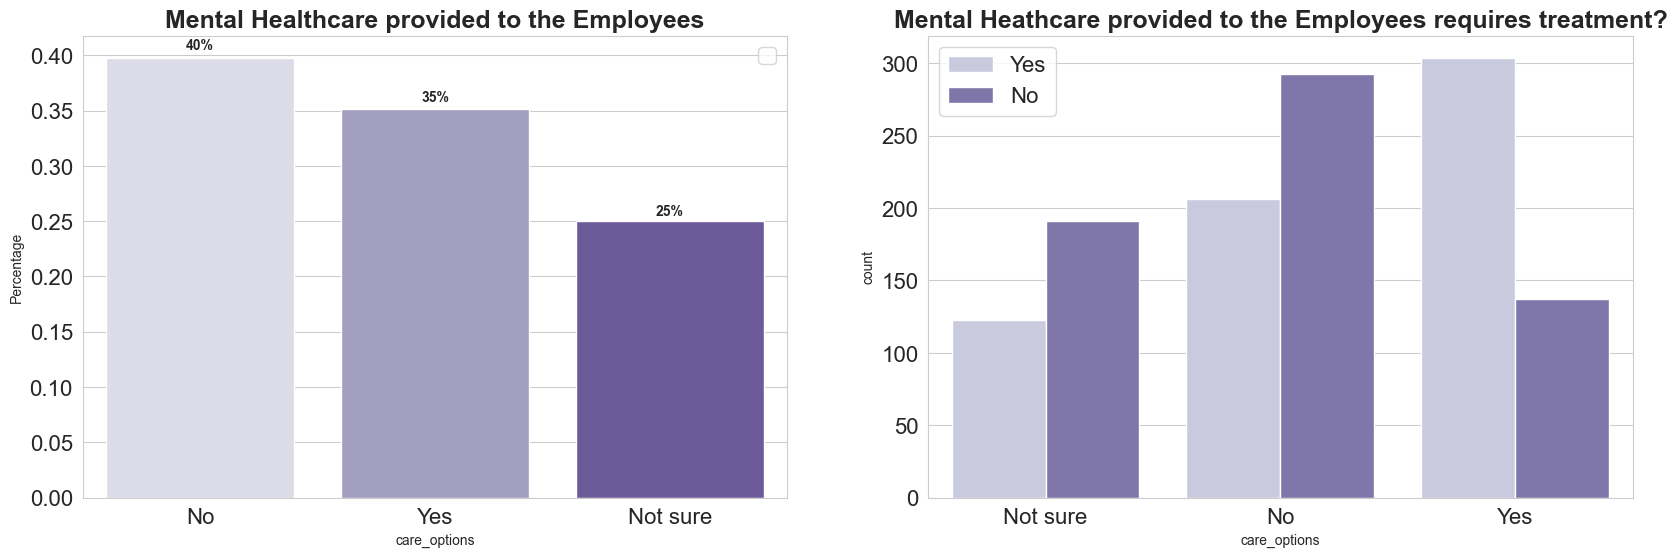

In [124]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
eda_percentage = df['care_options'].value_counts(normalize = True).rename_axis('care_options').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'care_options', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Healthcare provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='care_options', data=df, hue = 'treatment', palette='Purples')
plt.title('Mental Heathcare provided to the Employees requires treatment?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [125]:
"""
Q:Do you know the options for mental health care your employer provides?
"""

'\nQ:Do you know the options for mental health care your employer provides?\n'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


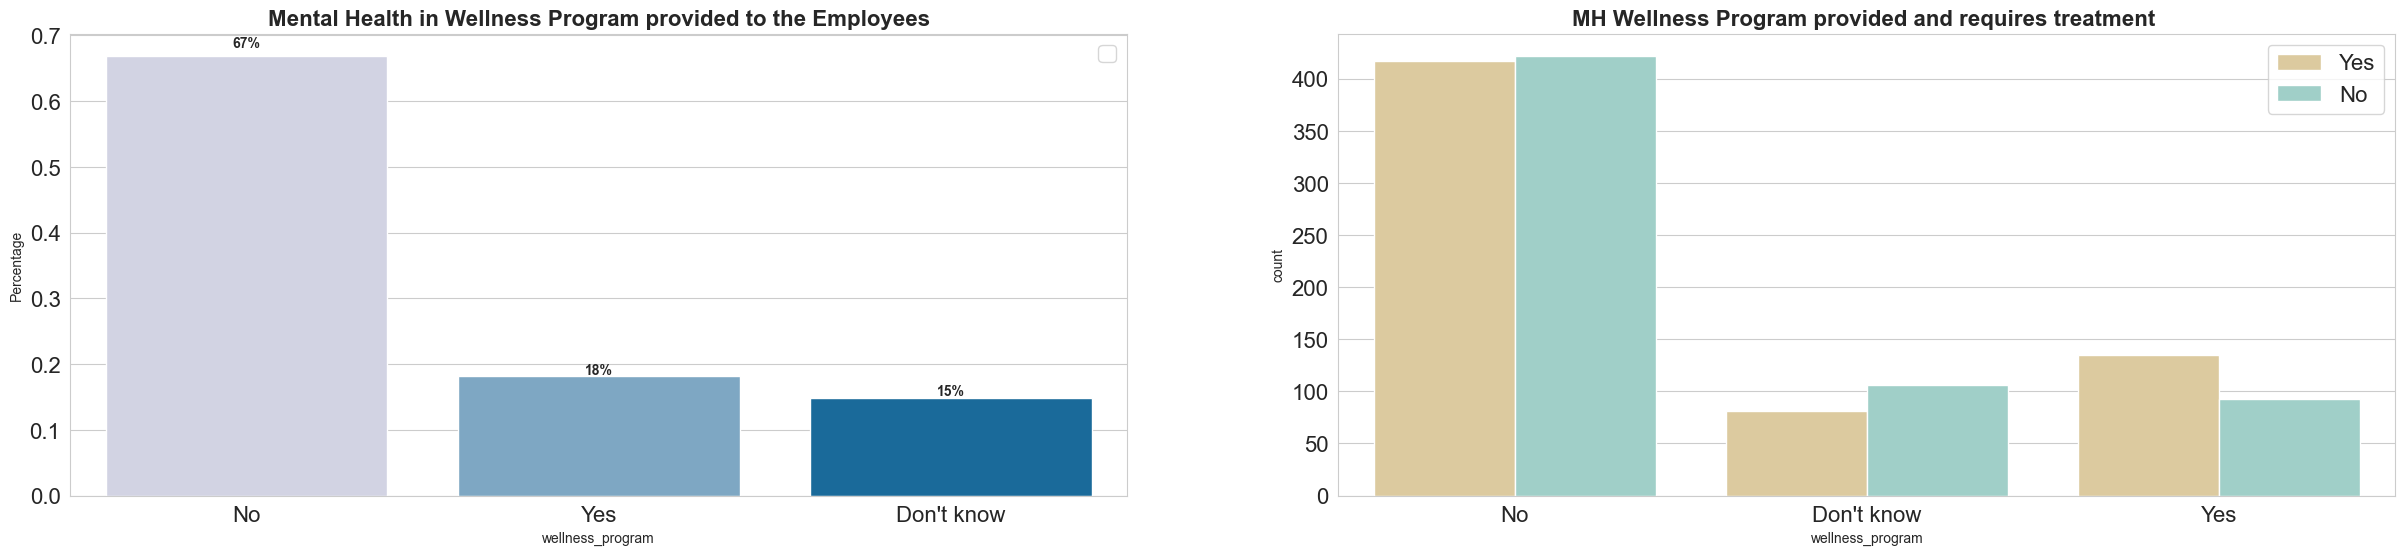

In [126]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
eda_percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage, palette='PuBu')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='wellness_program', data=df, hue ='treatment', palette='BrBG')
plt.title('MH Wellness Program provided and requires treatment ', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [127]:
"""
Q: Has your employer ever discussed mental health as part of an employee wellness program?
--> 225 people said yes, and 135 of these people require treatment, which is 60% 
--> 67% of people said there is no wellness program. But close to half of those respondents want to get treatment.
"""

'\nQ: Has your employer ever discussed mental health as part of an employee wellness program?\n--> 225 people said yes, and 135 of these people require treatment, which is 60% \n--> 67% of people said there is no wellness program. But close to half of those respondents want to get treatment.\n'

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   self_employed              1236 non-null   object
 3   family_history             1254 non-null   object
 4   treatment                  1254 non-null   object
 5   work_interfere             991 non-null    object
 6   no_employees               1254 non-null   object
 7   remote_work                1254 non-null   object
 8   tech_company               1254 non-null   object
 9   benefits                   1254 non-null   object
 10  care_options               1254 non-null   object
 11  wellness_program           1254 non-null   object
 12  seek_help                  1254 non-null   object
 13  anonymity                  1254 non-null   object
 14  leave        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


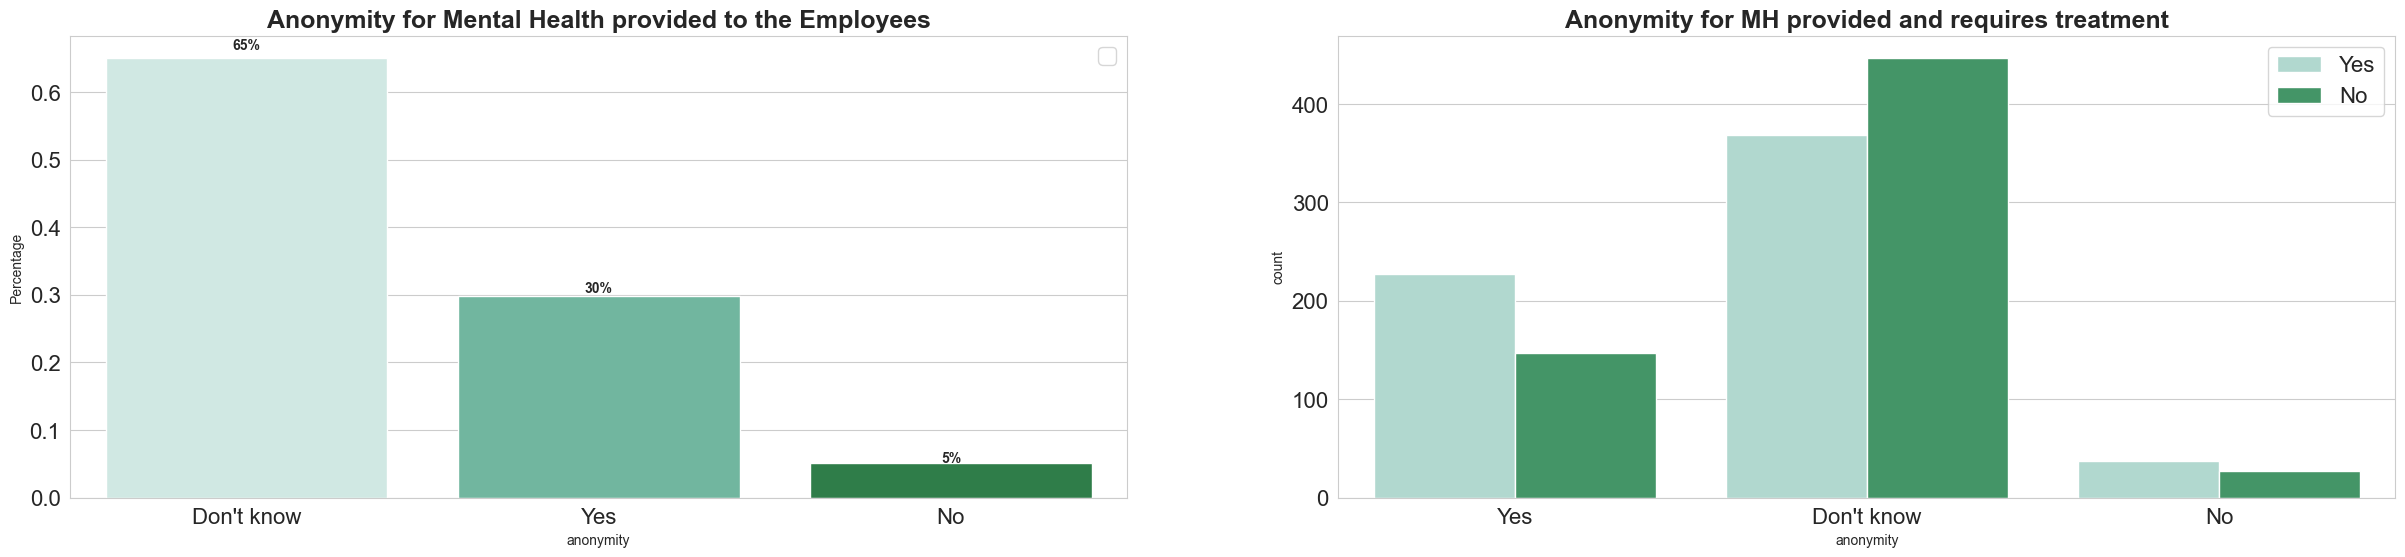

In [129]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
eda_percentage = df['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'anonymity', y = 'Percentage', data = eda_percentage, palette='BuGn')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='anonymity', data=df, hue = 'treatment', palette='BuGn')
plt.title('Anonymity for MH provided and requires treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [130]:
"""
Q: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
--> 65% of the people were not aware whether anonymity was provided to them 
--> 30% said yes to the provision of anonymity by the company
--> the people who answered yes to the provision of anonymity, around 60% of them were seeking help regarding their mental condition. 
--> Possible reasoning for this may be that the employee feels that the company has protected his/her privacy and can be trusted with knowing the mental health condition of it's workers
--> The most basic reason behind hiding this from the fellow workers can be the social stigma attached to mental health.
"""

"\nQ: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?\n--> 65% of the people were not aware whether anonymity was provided to them \n--> 30% said yes to the provision of anonymity by the company\n--> the people who answered yes to the provision of anonymity, around 60% of them were seeking help regarding their mental condition. \n--> Possible reasoning for this may be that the employee feels that the company has protected his/her privacy and can be trusted with knowing the mental health condition of it's workers\n--> The most basic reason behind hiding this from the fellow workers can be the social stigma attached to mental health.\n"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


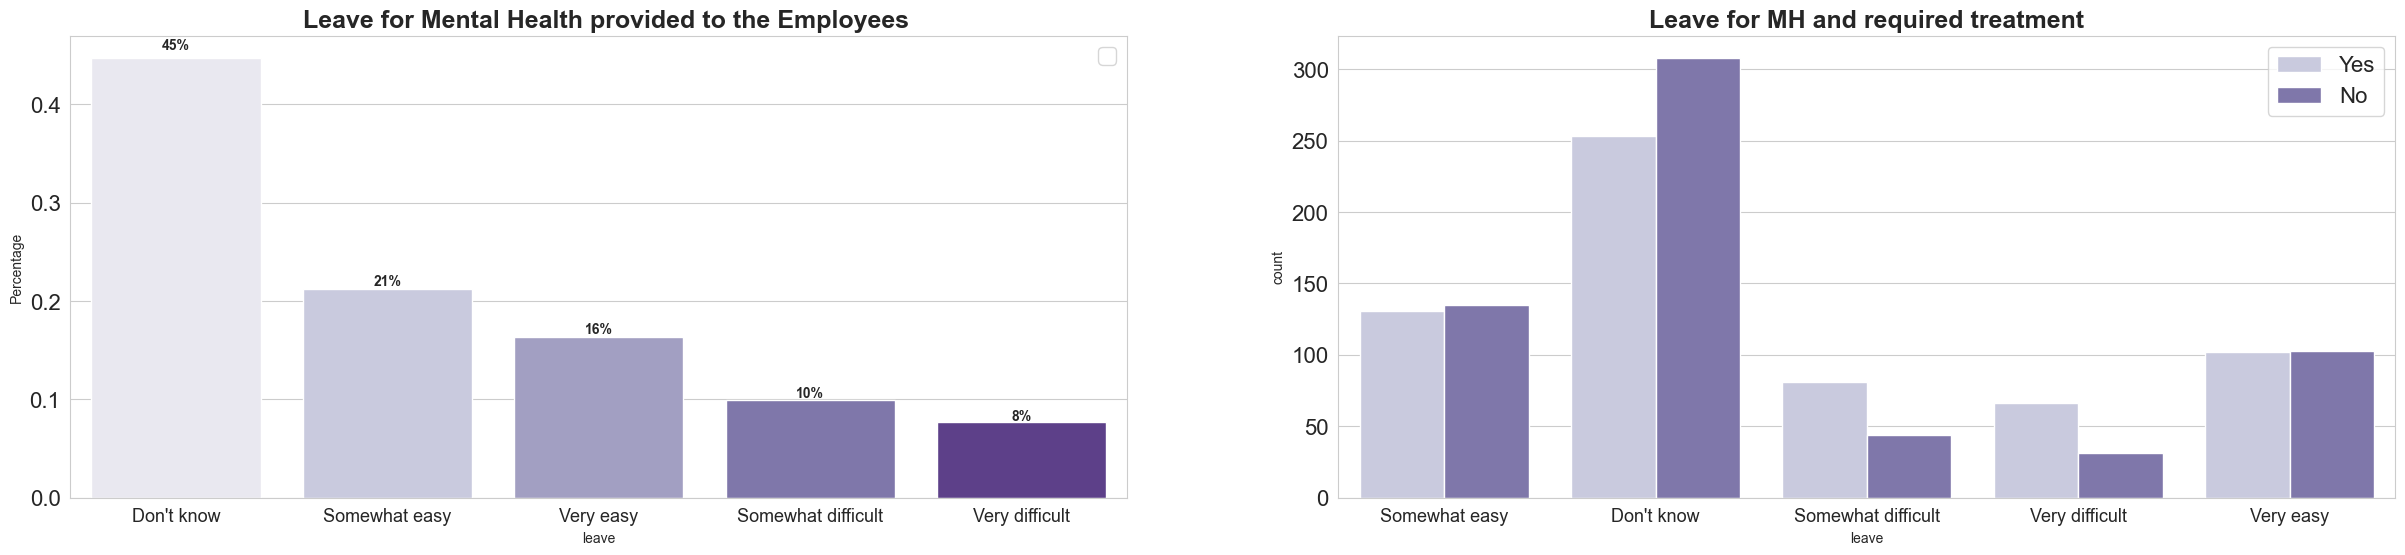

In [131]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
eda_percentage = df['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('  Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='leave', data=df, hue = 'treatment', palette='Purples')
plt.title('Leave for MH and required treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [132]:
"""
Q: How easy is it for you to take medical leave for a mental health condition?
--> close to 50% of the people answered that they did not know about it, suprisingly around 45% of those people sought help for their condition.
--> 8% said that it was very difficult for them to get leave for mental health and out of those, 75% of them sought for help.
--> Employees who said it was 'somewhat easy' or 'very easy' to get leave had almost 50% people seeking medical help.
"""

"\nQ: How easy is it for you to take medical leave for a mental health condition?\n--> close to 50% of the people answered that they did not know about it, suprisingly around 45% of those people sought help for their condition.\n--> 8% said that it was very difficult for them to get leave for mental health and out of those, 75% of them sought for help.\n--> Employees who said it was 'somewhat easy' or 'very easy' to get leave had almost 50% people seeking medical help.\n"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


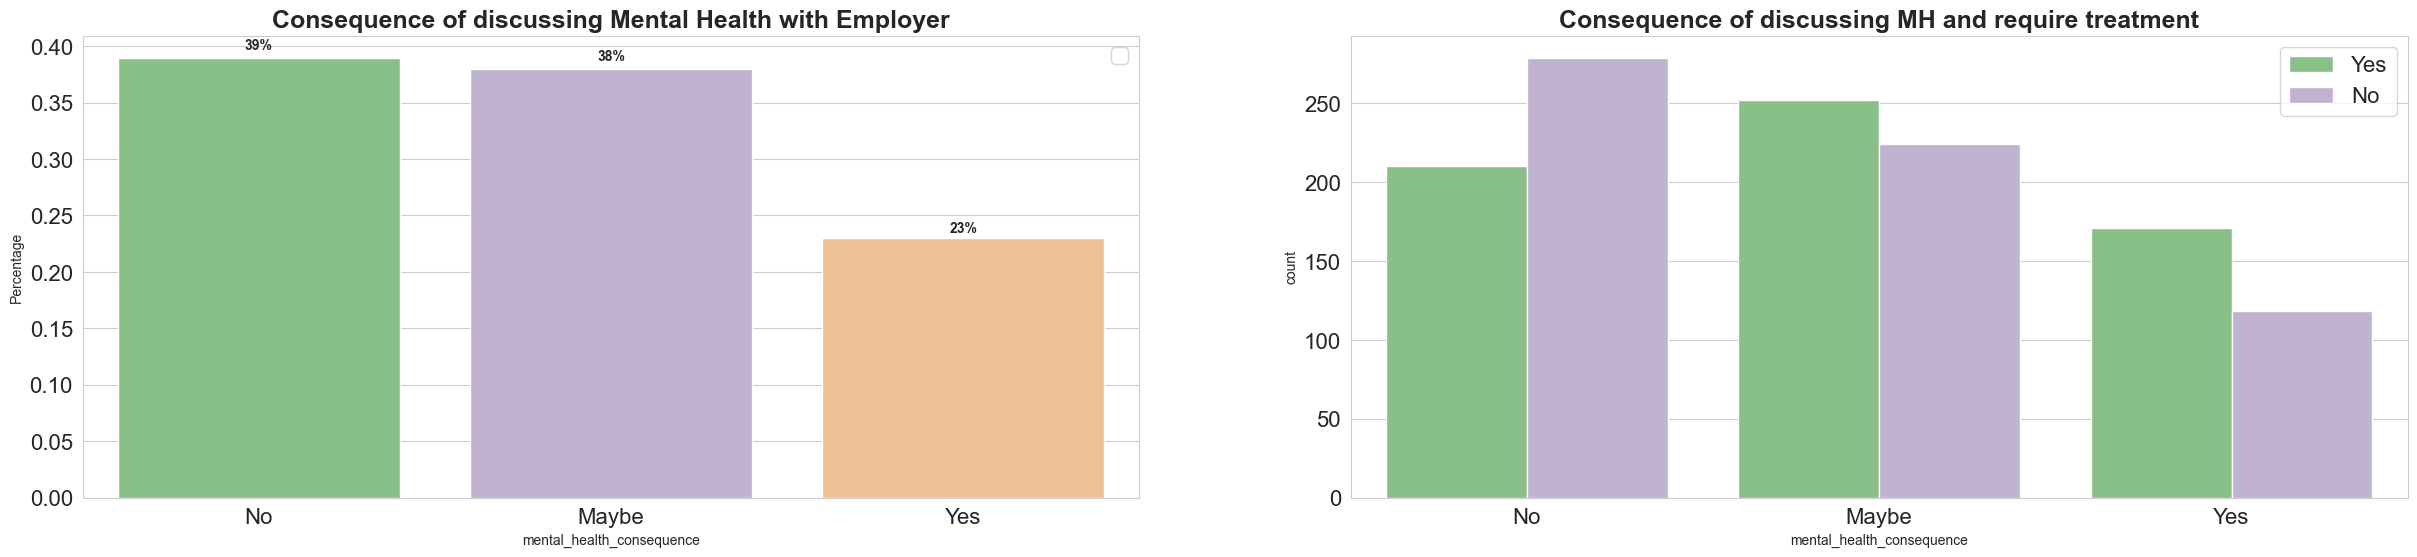

In [133]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = eda_percentage, palette='Accent')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='mental_health_consequence', hue = 'treatment', data=df, palette='Accent')
plt.title('Consequence of discussing MH and require treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [134]:
"""
Q: Do you think that discussing a mental health issue with your employer would have negative consequences?
--> around 40% each answered Maybe as well as No for the negative impact of discussing mental health consequences with the employer and about 23% said Yes to it
--> 23% is a significant number who feel that discussing their mental health might create a negative impact on their employer.
--> out of the people who answered No, there were only around 40% of the people who actually sought after help, whereas in both the other categories, it is more than 50%
"""

'\nQ: Do you think that discussing a mental health issue with your employer would have negative consequences?\n--> around 40% each answered Maybe as well as No for the negative impact of discussing mental health consequences with the employer and about 23% said Yes to it\n--> 23% is a significant number who feel that discussing their mental health might create a negative impact on their employer.\n--> out of the people who answered No, there were only around 40% of the people who actually sought after help, whereas in both the other categories, it is more than 50%\n'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


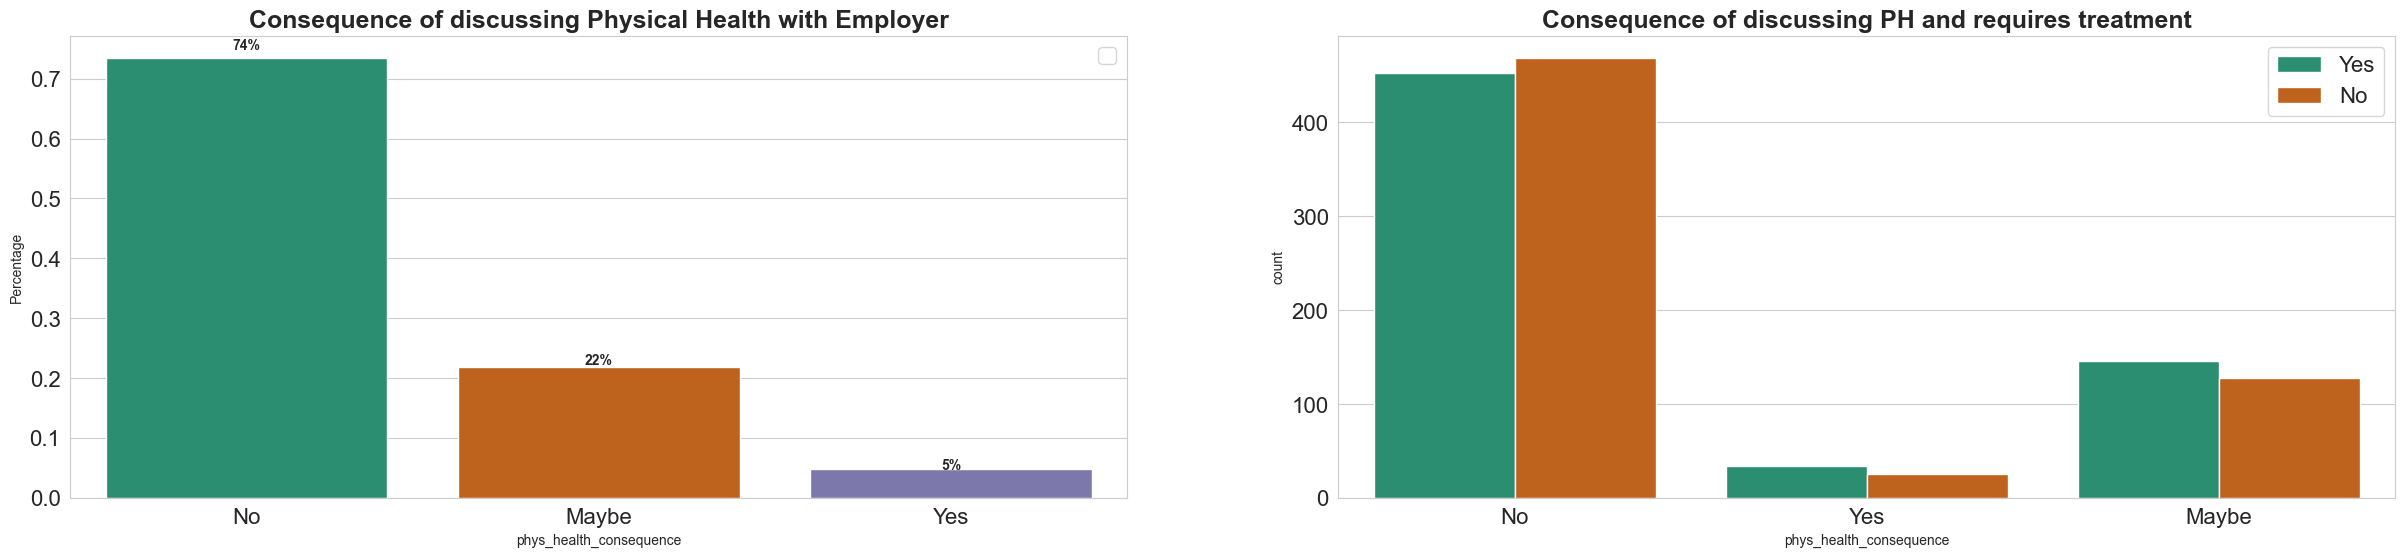

In [135]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
eda_percentage = df['phys_health_consequence'].value_counts(normalize = True).rename_axis('phys_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_consequence', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='phys_health_consequence', data=df, hue = 'treatment', palette='Dark2')
plt.title('Consequence of discussing PH and requires treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [136]:
"""
Q: Do you think that discussing a physical health issue with your employer would have negative consequences?
--> More than 70% of the employees believe that their physical health does not create a negative impact on their employer and only 5% of them believes that it does.
--> While it maybe incorrect for us to draw any conclusions about whether they seek mental help on the basis of their physical condition, because it is more or less same for all the three categories, 
-->we must keep in mind about how differently mental and physical health are treated as a whole.
"""

'\nQ: Do you think that discussing a physical health issue with your employer would have negative consequences?\n--> More than 70% of the employees believe that their physical health does not create a negative impact on their employer and only 5% of them believes that it does.\n--> While it maybe incorrect for us to draw any conclusions about whether they seek mental help on the basis of their physical condition, because it is more or less same for all the three categories, \n-->we must keep in mind about how differently mental and physical health are treated as a whole.\n'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


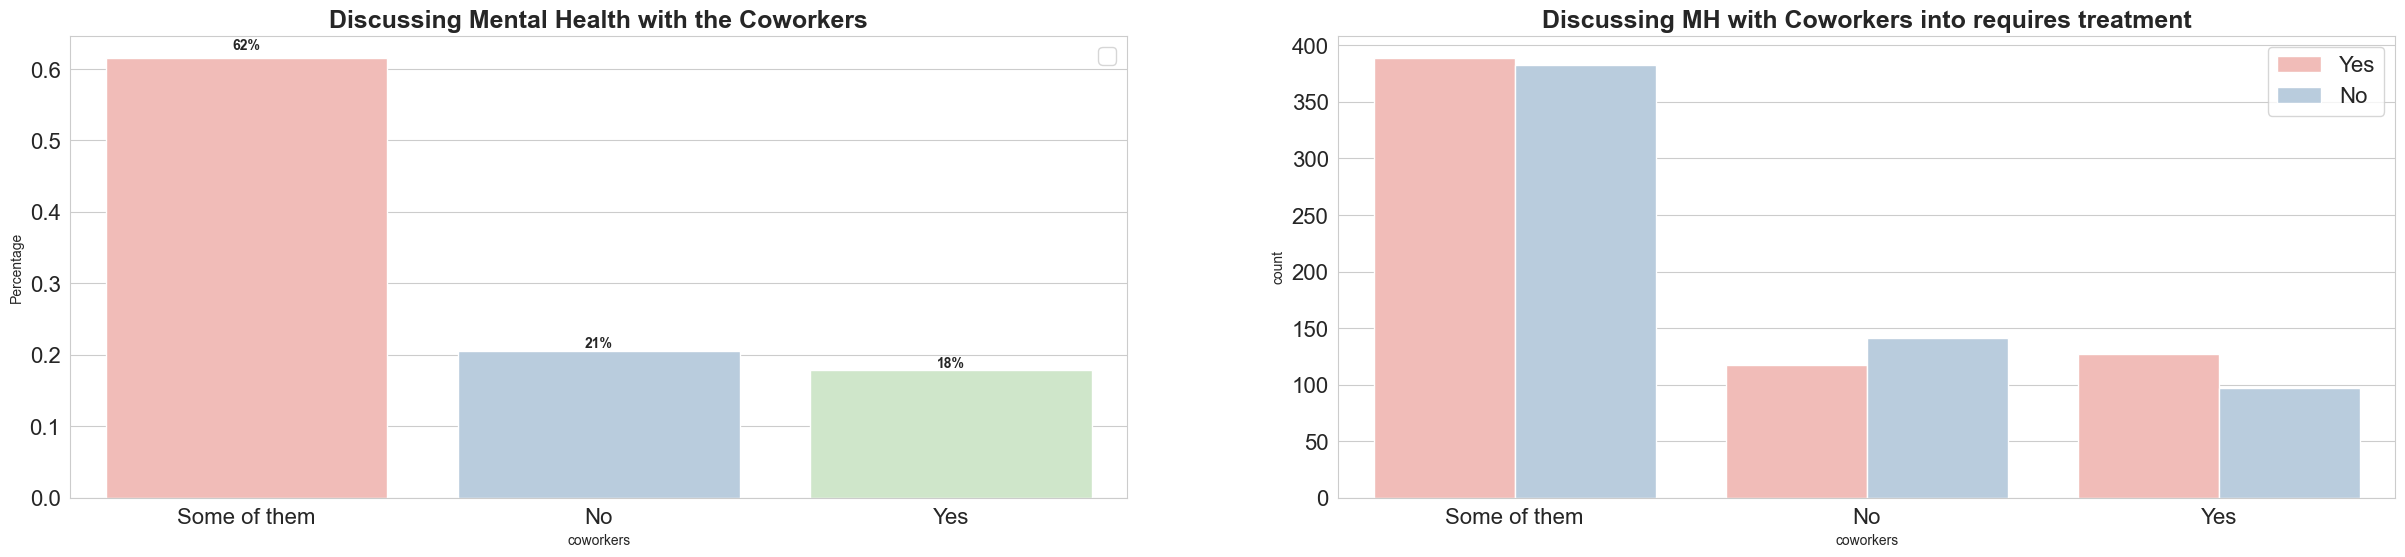

In [137]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
eda_percentage = df['coworkers'].value_counts(normalize = True).rename_axis('coworkers').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'coworkers', y = 'Percentage', data = eda_percentage, palette='Pastel1')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='coworkers', hue = 'treatment', data=df, palette='Pastel1')
plt.title('Discussing MH with Coworkers into requires treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [138]:
"""
Q: Would you be willing to discuss a mental health issue with your coworkers?
--> 62% of the employees said that they might be comfortable discussing some type of mental problems with their coworkers, and out of them around 50% actually sought for medical help.
--> 20% of the employees believed that discussing mental health with their coworkers wasn't a good option for them.
"""

"\nQ: Would you be willing to discuss a mental health issue with your coworkers?\n--> 62% of the employees said that they might be comfortable discussing some type of mental problems with their coworkers, and out of them around 50% actually sought for medical help.\n--> 20% of the employees believed that discussing mental health with their coworkers wasn't a good option for them.\n"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


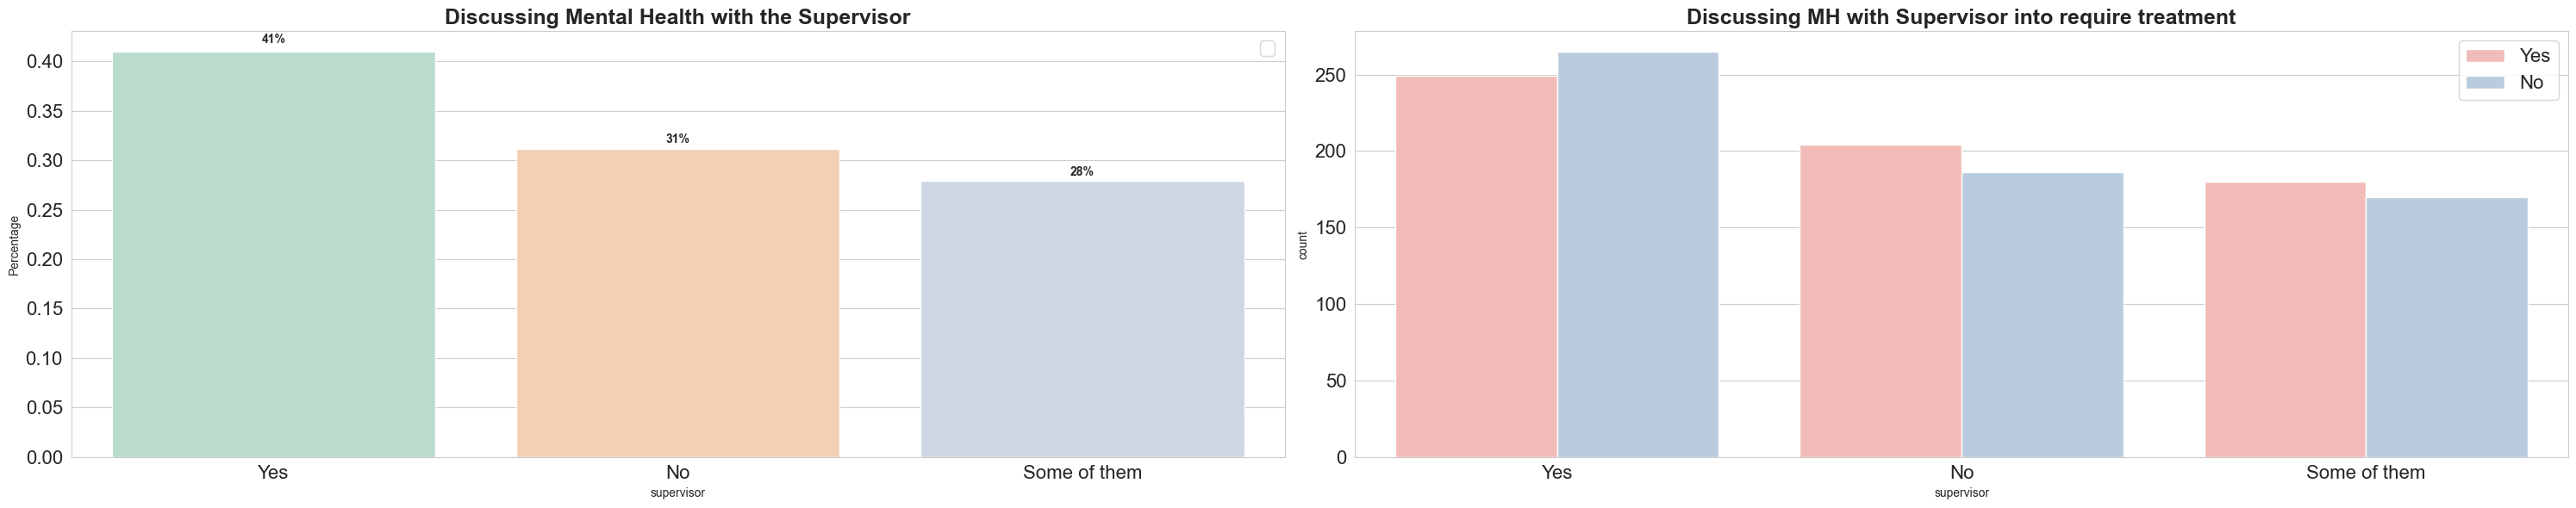

In [139]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
eda_percentage = df['supervisor'].value_counts(normalize = True).rename_axis('supervisor').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'supervisor', y = 'Percentage', data = eda_percentage, palette='Pastel2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='supervisor', data=df, hue = 'treatment', palette='Pastel1')
plt.title('Discussing MH with Supervisor into require treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.tight_layout()
plt.show()

In [140]:
"""
Q: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
--> around 40% of the workers believe in sharing their mental health with their supervisors. 
--> the second graph, employees who actually sought for help regarding their mental health was more or less similar for all the three categories.


"""

'\nQ: Would you be willing to discuss a mental health issue with your direct supervisor(s)?\n--> around 40% of the workers believe in sharing their mental health with their supervisors. \n--> the second graph, employees who actually sought for help regarding their mental health was more or less similar for all the three categories.\n\n\n'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


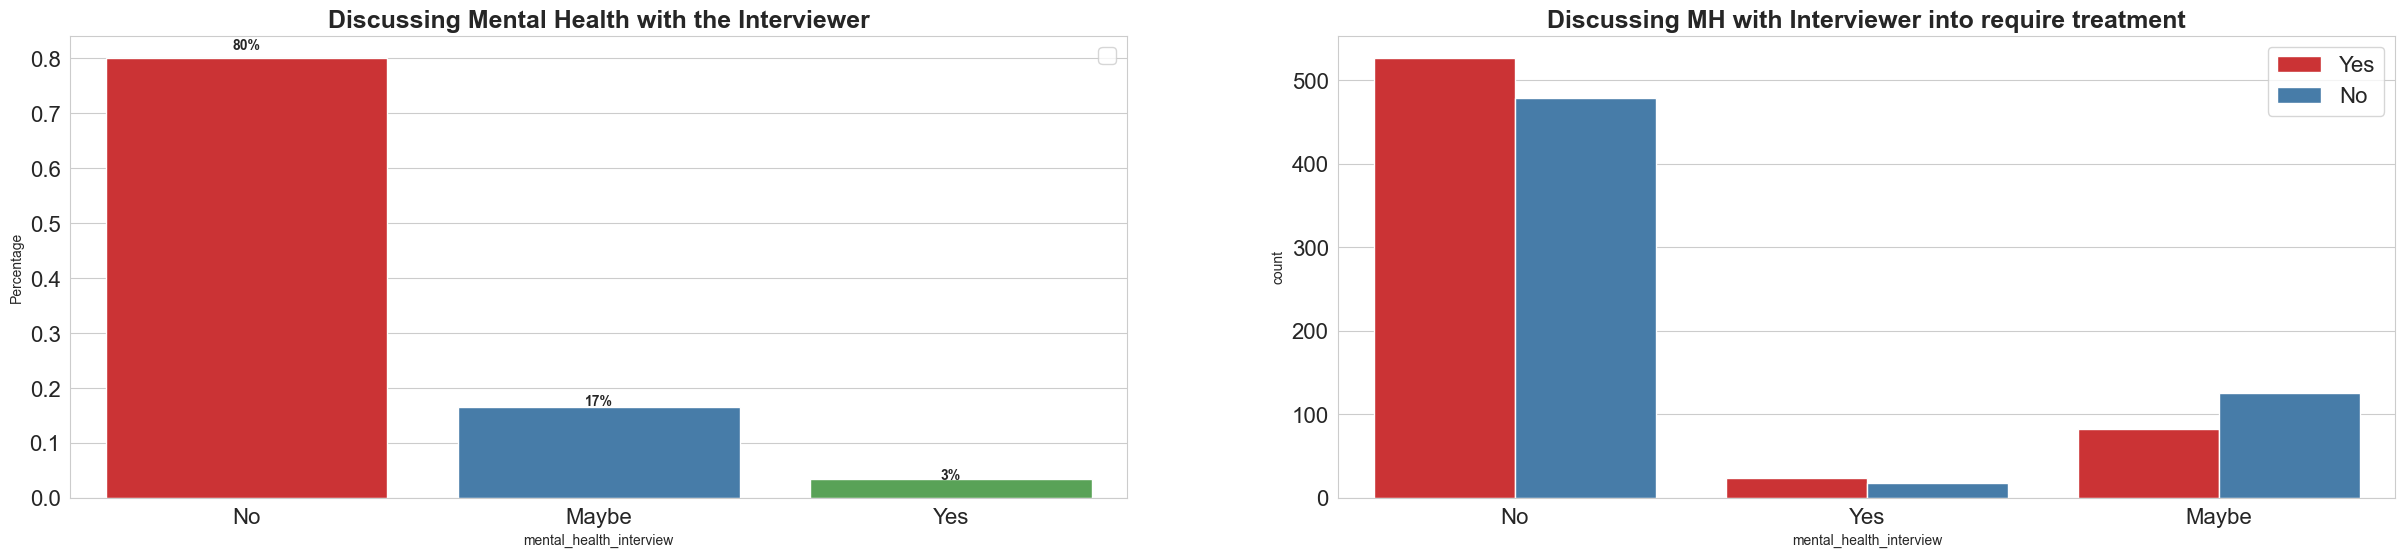

In [141]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_interview'].value_counts(normalize = True).rename_axis('mental_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_interview', y = 'Percentage', data = eda_percentage, palette='Set1')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='mental_health_interview', data=df, hue = 'treatment', palette='Set1')
plt.title('Discussing MH with Interviewer into require treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [142]:
"""
Q: Do you think that discussing a mental health issue with your employer would have negative consequences?
--> 80% of the respondents believe that it is a good option to discuss your mental health with the future employer. 
--> 17% of the candidates seem confused about whether they should be discussing their mental conditions with the future employer or not, less than 5% think that it may not be a good option discussing it.
"""

'\nQ: Do you think that discussing a mental health issue with your employer would have negative consequences?\n--> 80% of the respondents believe that it is a good option to discuss your mental health with the future employer. \n--> 17% of the candidates seem confused about whether they should be discussing their mental conditions with the future employer or not, less than 5% think that it may not be a good option discussing it.\n'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


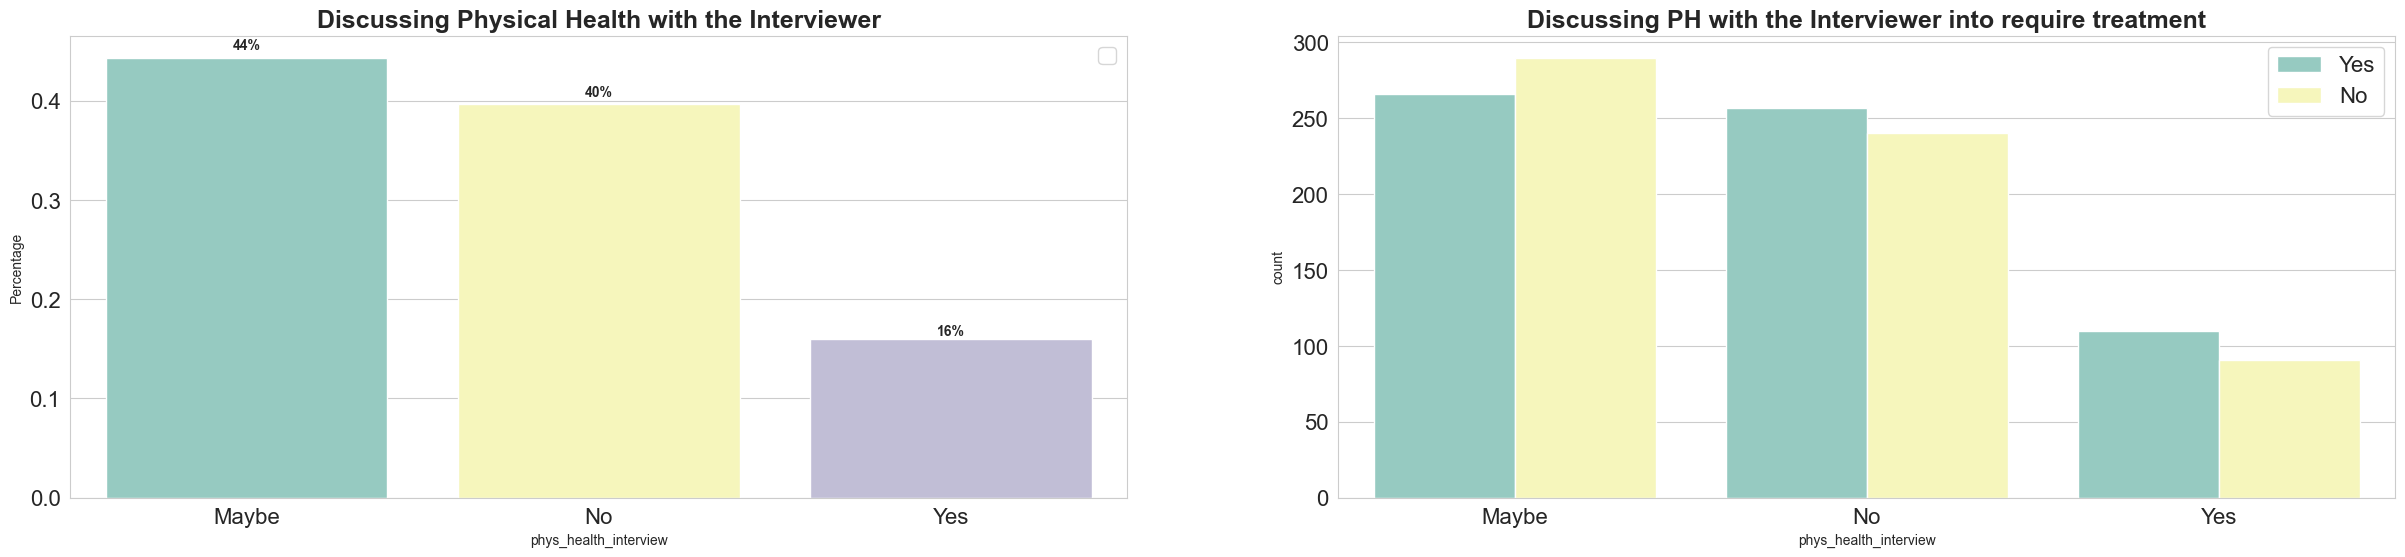

In [143]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
eda_percentage = df['phys_health_interview'].value_counts(normalize = True).rename_axis('phys_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_interview', y = 'Percentage', data = eda_percentage, palette='Set3')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='phys_health_interview', hue = 'treatment', data=df, palette='Set3')
plt.title('Discussing PH with the Interviewer into require treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [144]:
"""
Q: Would you bring up a physical health issue with a potential employer in an interview?
--> While a majority of the people are still dubious about discussing their physical health condition with the future employer, however, 16% believe that there is no issue in discussing their physical health conditions
--> Around 50% of the people still remain confused about whether it is a good option to discuss their condition or not.
"""

'\nQ: Would you bring up a physical health issue with a potential employer in an interview?\n--> While a majority of the people are still dubious about discussing their physical health condition with the future employer, however, 16% believe that there is no issue in discussing their physical health conditions\n--> Around 50% of the people still remain confused about whether it is a good option to discuss their condition or not.\n'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


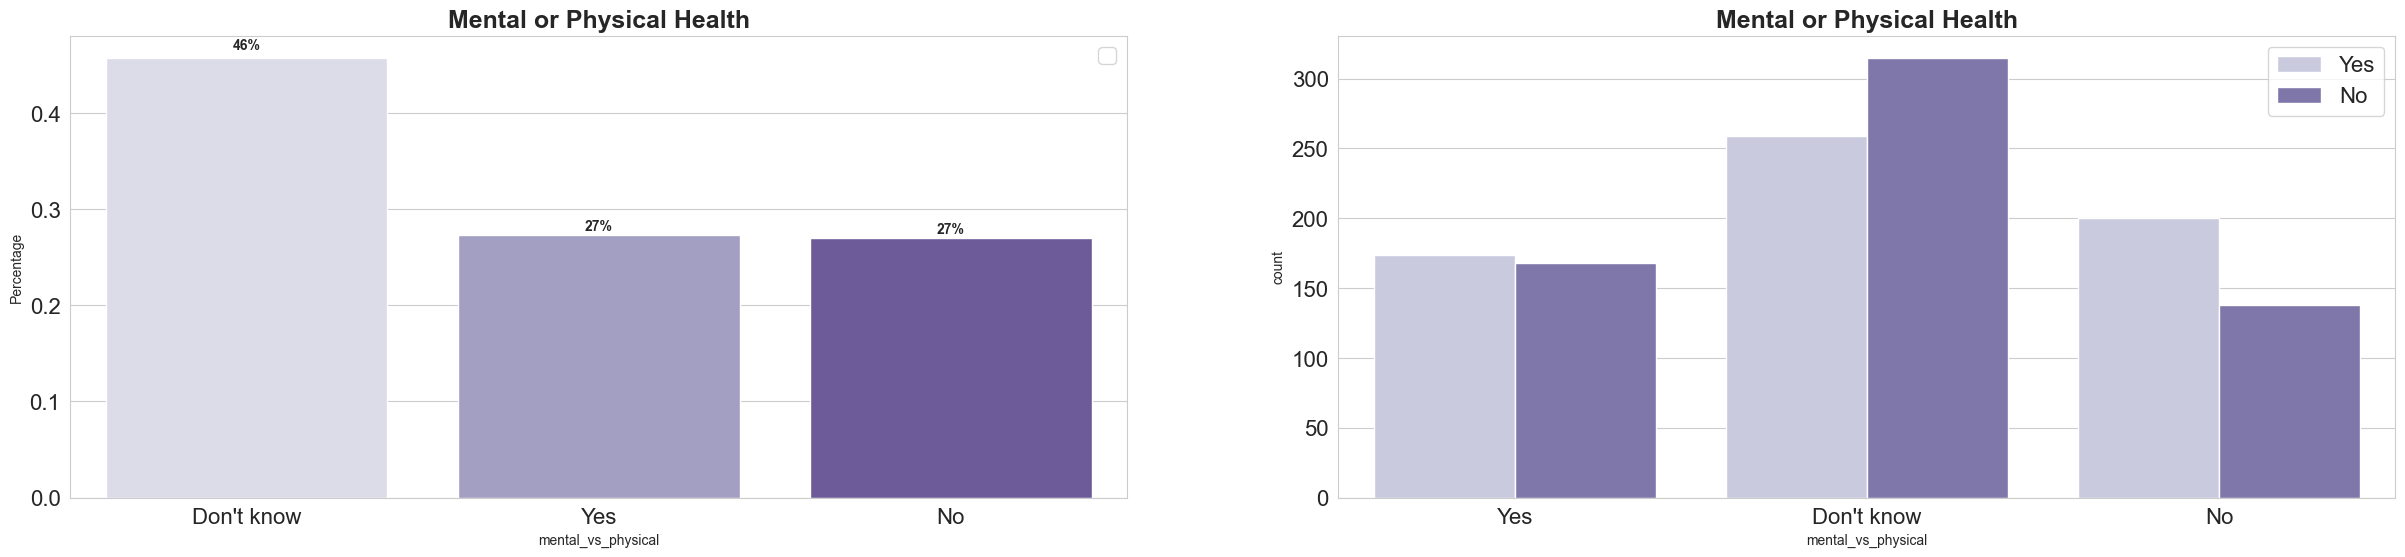

In [145]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_vs_physical', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='mental_vs_physical', hue = 'treatment', data=df, palette='Purples')
plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [146]:
"""
Q: Do you feel that your employer takes mental health as seriously as physical health?
--> close to 50% people said that they didn't know, the number of people who answered Yes as well as No were completely equal.
--> For the people who answered Yes as well as the ones who answered No, more than 505 of them sought after medical help for their mental health, whereas it was not the case for the one's belonging to the 'Don't know' category.
"""

"\nQ: Do you feel that your employer takes mental health as seriously as physical health?\n--> close to 50% people said that they didn't know, the number of people who answered Yes as well as No were completely equal.\n--> For the people who answered Yes as well as the ones who answered No, more than 505 of them sought after medical help for their mental health, whereas it was not the case for the one's belonging to the 'Don't know' category.\n"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


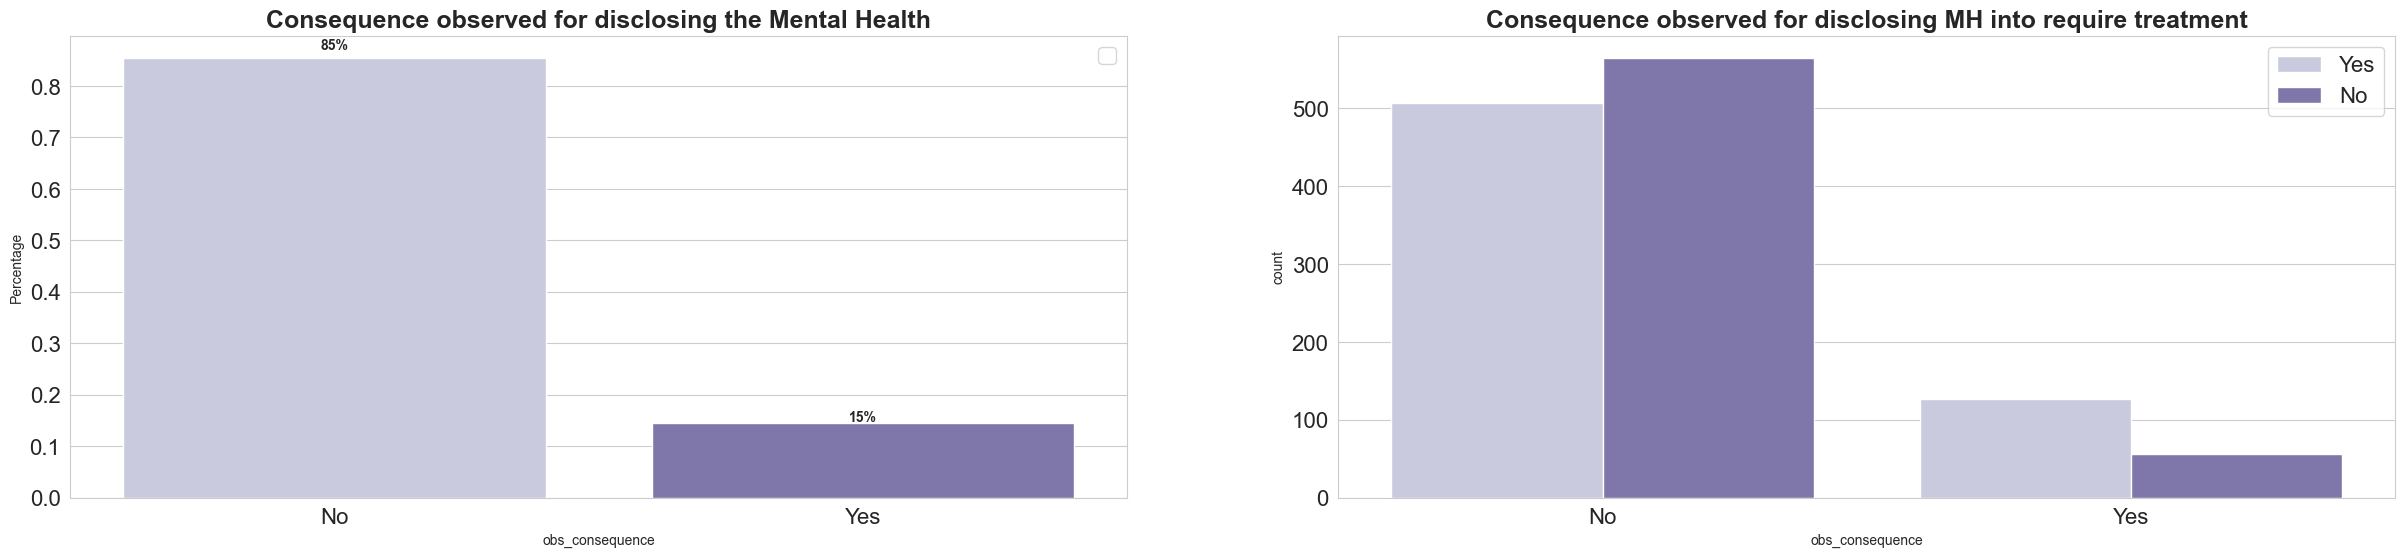

In [147]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
eda_percentage = df['obs_consequence'].value_counts(normalize = True).rename_axis('obs_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'obs_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence observed for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='obs_consequence', hue = 'treatment', data=df, palette='Purples')
plt.title('Consequence observed for disclosing MH into require treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [148]:
"""
Q: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

--> Majority ( 85% ) of the people, answered No to this question. 
--> This is quite important to note that IT being an organised sector, follows strict guidelines of employee satisfaction etc. 
--> Thus, we didn't come across any major issue regarding the employer behavior as such

EDA is donee!
"""

"\nQ: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?\n\n--> Majority ( 85% ) of the people, answered No to this question. \n--> This is quite important to note that IT being an organised sector, follows strict guidelines of employee satisfaction etc. \n--> Thus, we didn't come across any major issue regarding the employer behavior as such\n\nEDA is donee!\n"

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   self_employed              1236 non-null   object
 3   family_history             1254 non-null   object
 4   treatment                  1254 non-null   object
 5   work_interfere             991 non-null    object
 6   no_employees               1254 non-null   object
 7   remote_work                1254 non-null   object
 8   tech_company               1254 non-null   object
 9   benefits                   1254 non-null   object
 10  care_options               1254 non-null   object
 11  wellness_program           1254 non-null   object
 12  seek_help                  1254 non-null   object
 13  anonymity                  1254 non-null   object
 14  leave        

In [150]:
"""
there are only 20% of work_interfere so let's change NaN to "Don't know"
There are only 1.4% of self employed so let's change NaN to NOT self_employed
"""


'\nthere are only 20% of work_interfere so let\'s change NaN to "Don\'t know"\nThere are only 1.4% of self employed so let\'s change NaN to NOT self_employed\n'

In [151]:
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [152]:
df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())

['No' 'Yes']


In [153]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [154]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [155]:
col_list=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in col_list: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72] 
GENDER :['Female' 'Male' 'Other'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVIEW :['No' 'Yes' 'Maybe'] 
PHYS_HEALTH_INTE

In [156]:
"""
--> all the columns except the 'Age', consist of object type values.
--> most of the columns consist of values 'Yes', 'No' , 'Maybe' etc. which can be easily encoded.

Learning encoding now with categorical variables
"""

"\n--> all the columns except the 'Age', consist of object type values.\n--> most of the columns consist of values 'Yes', 'No' , 'Maybe' etc. which can be easily encoded.\n\nLearning encoding now with categorical variables\n"

In [157]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [158]:
df['treatment'].value_counts()

treatment
1    633
0    621
Name: count, dtype: int64

In [159]:
"""
the target column, i.e 'treatment' has almost equal values for both the categories. This means that we do not have to perform undersampling or oversampling.

Learn Heat map and find correlations
"""

"\nthe target column, i.e 'treatment' has almost equal values for both the categories. This means that we do not have to perform undersampling or oversampling.\n\nLearn Heat map and find correlations\n"

<Axes: >

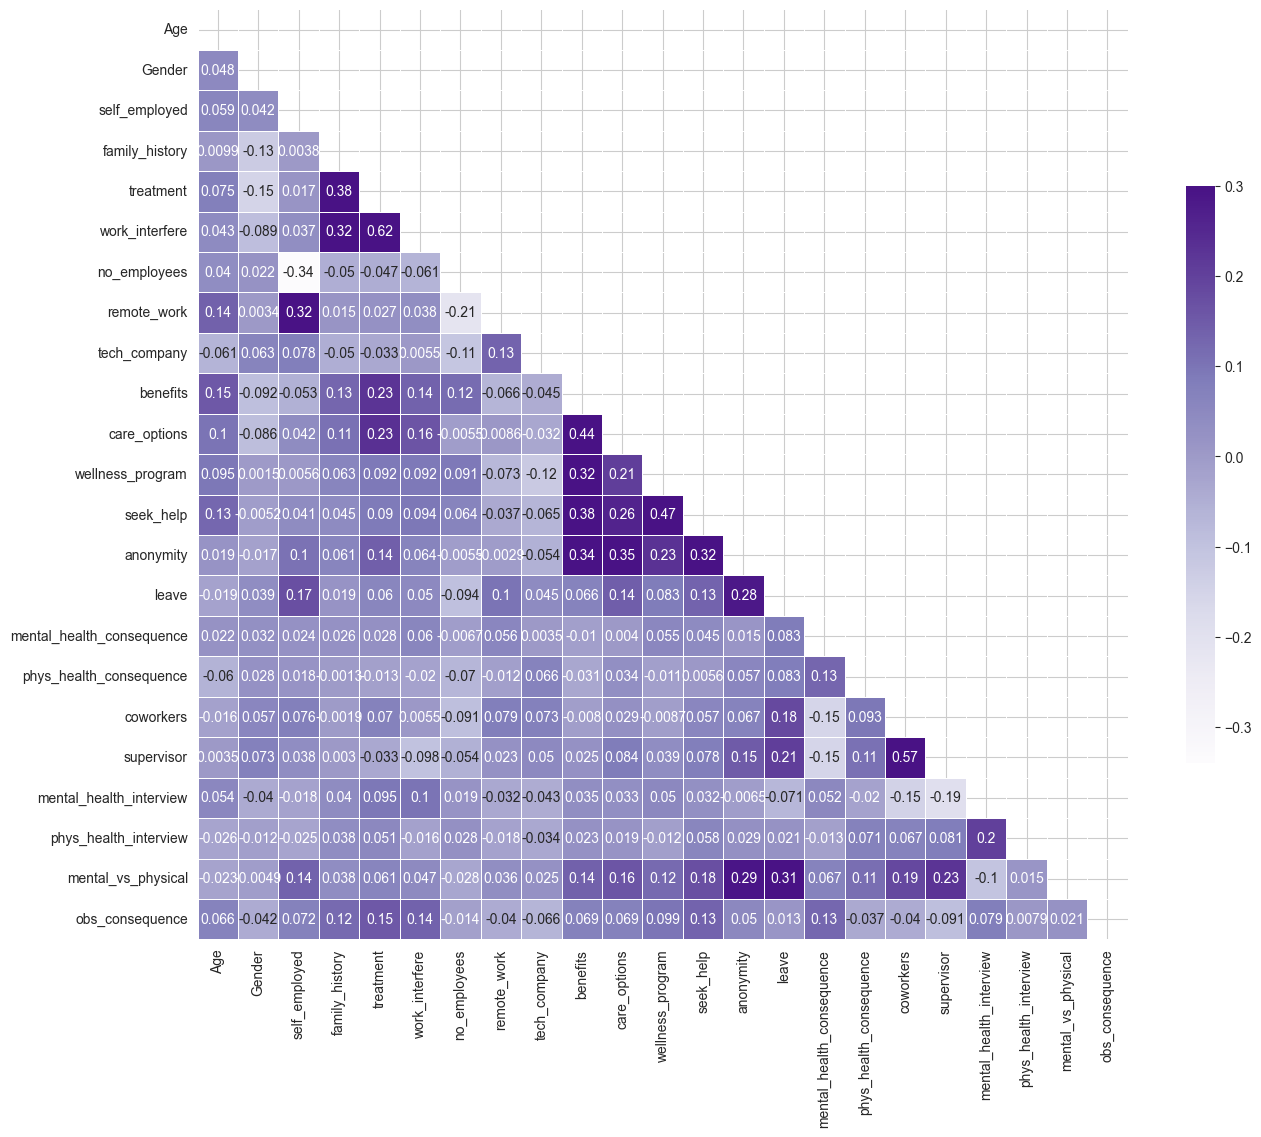

In [160]:
# Compute the correlation matrix
corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [161]:
"""
Evaluating Models
"""

'\nEvaluating Models\n'

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, auc
#import plot_roc_curve #deprecated (Updated libraries in next line)
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics

In [172]:
from sklearn.model_selection import train_test_split
X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [173]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, m

In [174]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8037135278514589
KNeighborsClassifier 0.6631299734748011
DecisionTreeClassifier 0.7214854111405835
RandomForestClassifier 0.7771883289124668
GradientBoostingClassifier 0.8116710875331565
AdaBoostClassifier 0.8010610079575596
XGBClassifier 0.7931034482758621


Text(0.5, 1.0, 'Plotting the Model Accuracies')

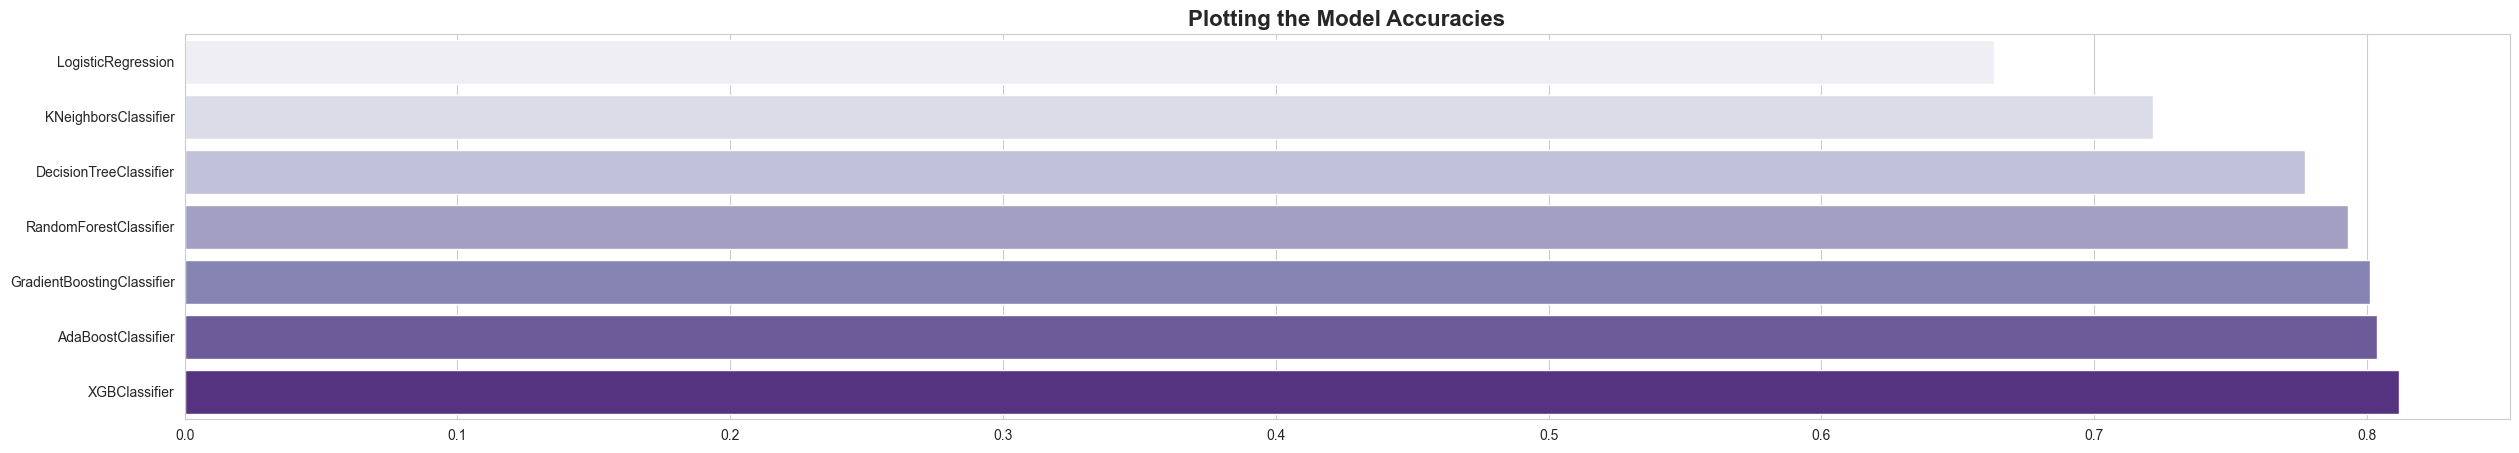

In [176]:
plt.figure(figsize = (30,5))
ax = sns.barplot(x = predicted, y = key, palette='Purples', order=predicted.sort())
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

Text(50.722222222222214, 0.5, 'Actual')

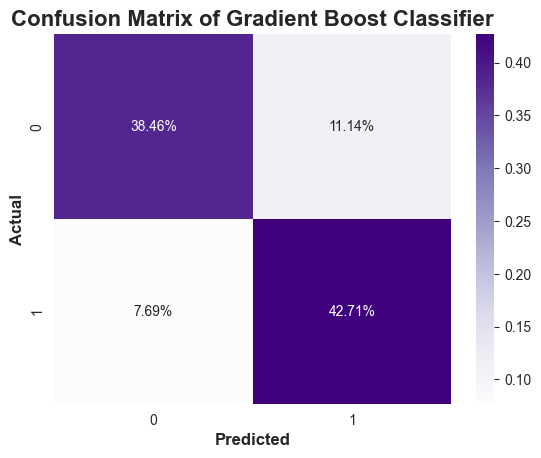

In [177]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

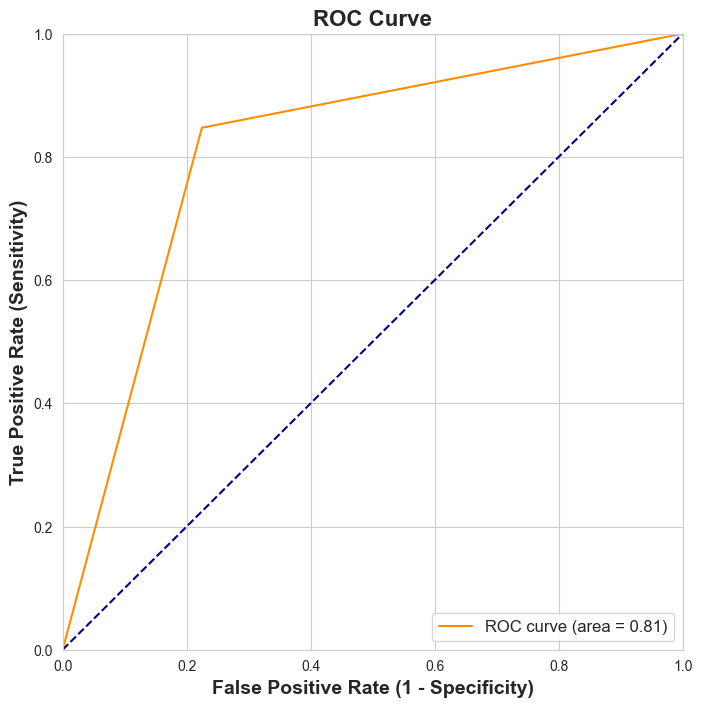

(array([0.        , 0.22459893, 1.        ]),
 array([0.        , 0.84736842, 1.        ]),
 array([inf,  1.,  0.]))

In [178]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)